In [1]:
%matplotlib inline
import os
import re

import matplotlib
import numpy as np
import pandas as pd
import xarray as xr

import climatools.html.html as climahtml
import climatools.scripts.g1_threshold as scripts

import IPython.display as display

import imp
imp.reload(scripts)

/lfs1/home/jackyu/anaconda3/envs/work/lib/python3.4/site-packages/matplotlib/__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


<module 'climatools.scripts.g1_threshold' from '/lfs1/home/jackyu/climatools/climatools/scripts/g1_threshold.py'>

In [2]:
# for printing some input parameters

def innames():
    return ['vstar', 'nband', 'nv', 'dv',
            'tsfc', 
            'pressure_reference_high',
            'temperature_reference_high', 
            'pressure_reference_low', 
            'temperature_reference_low',
            'ighigh', 
            'ng', 
            'absth',
            'wgt']


def pattern_assign(name):
    return ''' 
    parameter .* :: .* ({} .* = .* \n)
    '''.format(name)

def pattern_data(name):
    return '''
    (data [^/]+ {}[^,] [^/]+ / [^/]+ /)
    '''.format(name)

def pattern_atmpro():
    return '''
    (include \s+ '.*\.pro')
    '''


def get_input_params(code, names):
    results = []
    for name in names:
        regex = re.compile(pattern_assign(name), re.VERBOSE)
        results.extend(regex.findall(code))
        
        regex = re.compile(pattern_data(name), re.VERBOSE)
        results.extend(regex.findall(code))
        
    regex = re.compile(pattern_atmpro(), re.VERBOSE)
    results.extend(regex.findall(code))
        
    results = [result.replace('_r8', '') for result in results]
    return results


In [3]:
analysis = scripts.Analysis()

In [4]:
crd = analysis.model('crd')
crd.type_model = 'crd'
crd.rundir = os.path.join('/lfs1/home/jackyu/radiation/crd',
                          'LW/examples/separate_g_groups',
                          'study__lblnew_g1_threshold',
                          'h2o',
                          'band02_wn_340_540',
                          'ng_30/g_ascending',
                          'refPTs_P_200_T_250__P_1_T_250',
                          'ighigh_10',
                          'getabsth_auto__auto',
                          'absth_dlogN_uniform__dlogN_uniform',
                          'wgt_all_.7__all_.7',
                          'atmpro_mls')
crd.fpath_flux = 'output_fluxg.dat'
crd.fpath_coolr = 'output_coolrg.dat'
crd.linestyle = '-'
crd.load_data()

In [5]:
crdx_wgt = analysis.model('wgt')
crdx_wgt.type_model = 'crd'
crdx_wgt.rundir = os.path.join('/lfs1/home/jackyu/radiation/crd',
                          'LW/examples/separate_g_groups',
                          'study__lblnew_g1_threshold',
                          'h2o',
                          'band02_wn_340_540',
                          'ng_30/g_ascending',
                          'refPTs_P_200_T_250__P_1_T_250',
                          'ighigh_10',
                          'getabsth_auto__auto',
                          'absth_dlogN_uniform__dlogN_uniform',
                          'wgt_all_.7__all_.7',
                          'atmpro_mls')
crdx_wgt.fpath_flux = 'output_xfluxg.dat'
crdx_wgt.fpath_coolr = 'output_xcoolrg.dat'
crdx_wgt.linestyle = '--'
crdx_wgt.load_data()

In [6]:
fig = analysis.fig_fluxcoolr('fig1')
fig.ggroups = list(range(1, 30 + 1))
fig.vars_plot['flux'] = ['flug', 'fnetg']
fig.vars_plot['cooling rate'] = ['coolrg']
fig.colors['flug'] = 'darkred'
fig.colors['fnetg'] = 'lightcoral'
fig.colors['coolrg'] = 'blue'
fig.varlims_from_indexrange['linear'] = (50, 1050)
fig.varlims_from_indexrange['log'] = (1e-4, 50)

In [7]:
table_fluxg = analysis.table('table_fluxg')
table_fluxg.sumg = False
table_fluxg.vartype = 'flux'
table_fluxg.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolrg = analysis.table('table_coolrg')
table_coolrg.vartype = 'cooling rate'
table_coolrg.sumg = False
table_coolrg.at_pressures = crd.data['cooling rate']\
                               .coords['pressure']\
                               .isel(pressure=[0, -1])


In [8]:
table_flux = analysis.table('table_flux')
table_flux.sumg = True
table_flux.vartype = 'flux'
table_flux.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolr = analysis.table('table_coolr')
table_coolr.vartype = 'cooling rate'
table_coolr.sumg = True
table_coolr.at_pressures = crd.data['cooling rate']\
                              .coords['pressure']\
                              .isel(pressure=[0, -1])

In [9]:
table_dgdgs = analysis.table('dgdgs')
table_dgdgs.vartype = 'dgdgs'
table_dgdgs.sumg = False

In [10]:
# print some input parameters

with open(os.path.join(crd.rundir, 'lblnew.f'), 
          mode='r', encoding='utf-8') as f:
    c = f.read()

print('\n\n'.join(get_input_params(c, innames())))

vstar = 340

nband = 200

nv = 200

dv = 0.005

tsfc = 294.0

pressure_reference_high = 1.

temperature_reference_high = 250.

pressure_reference_low = 200.

temperature_reference_low = 250.

ighigh = 10

ngas = 6      

ng = 30

data absth(:, 1) /

!     thresholds for reference (P, T) low
!     data absth(:, 2) /

data wgt
     &     /30 * .7/

include 'mls75.pro'


In [11]:
fig.display_hrefanchor()

In [12]:
table_fluxg.display_hrefanchor()
table_coolrg.display_hrefanchor()
table_flux.display_hrefanchor()
table_coolr.display_hrefanchor()

In [13]:
table_dgdgs.display_hrefanchor()

In [14]:
s_abscom = 'Overall absth'
display.HTML(climahtml.getHTML_hrefanchor(s_abscom))

In [15]:
#for g in range(1, 20 + 1):
#    s = 'Table: cooling rate. g-group {}'.format(g)
#    html = climahtml.getHTML_hrefanchor(s)
#    display.display(display.HTML(html))

# Figure: flux, cooling rate g-group 1

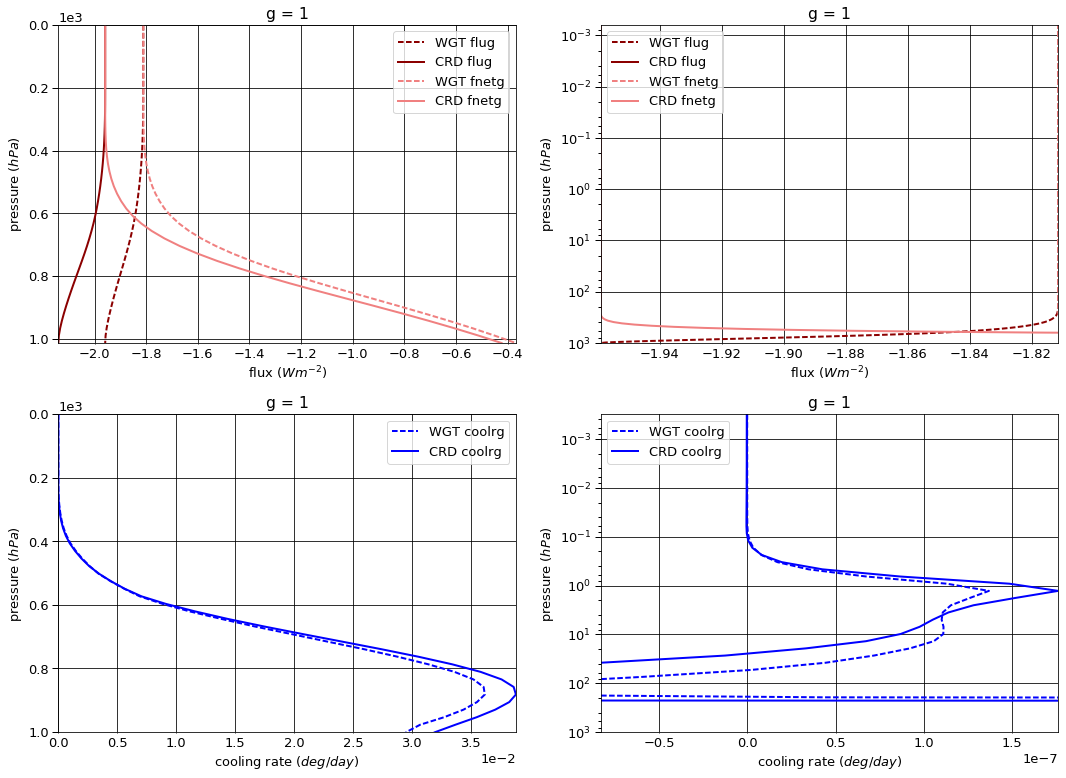

# Figure: flux, cooling rate g-group 2

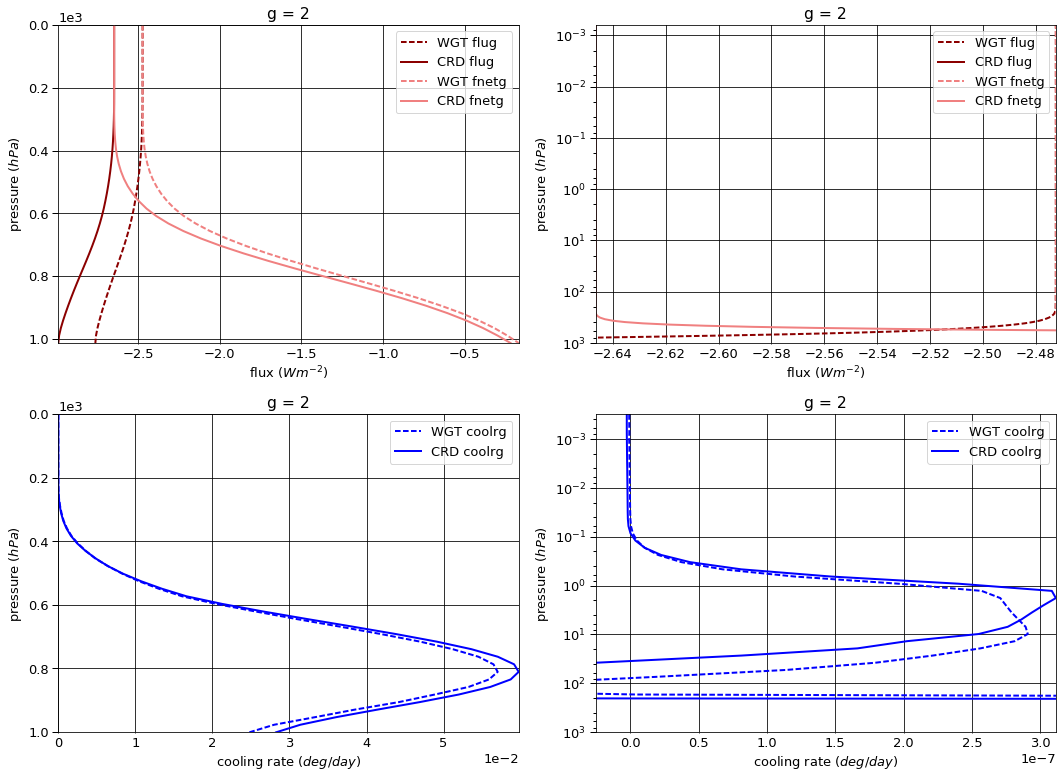

# Figure: flux, cooling rate g-group 3

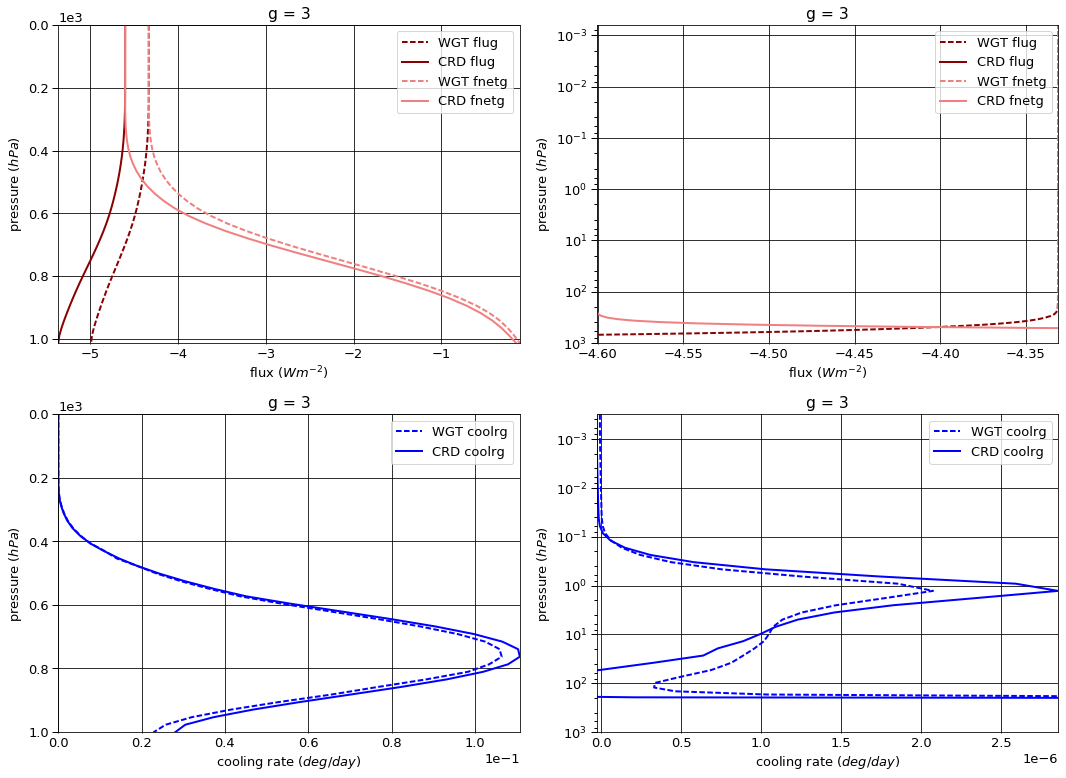

# Figure: flux, cooling rate g-group 4

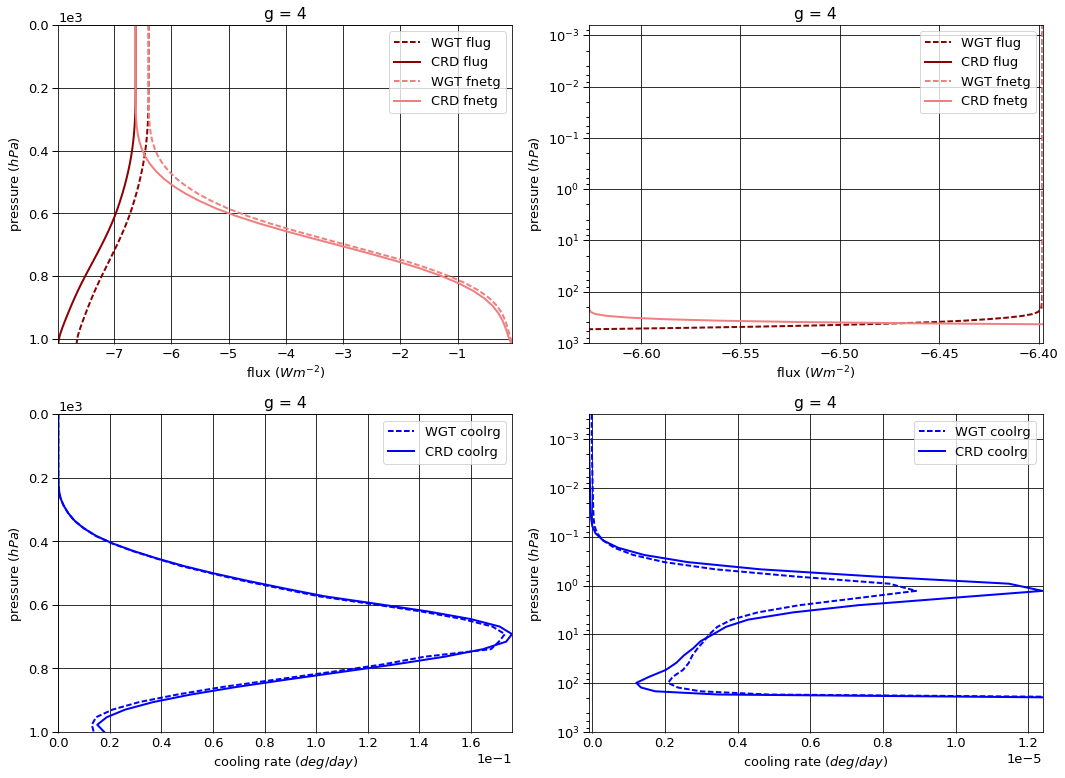

# Figure: flux, cooling rate g-group 5

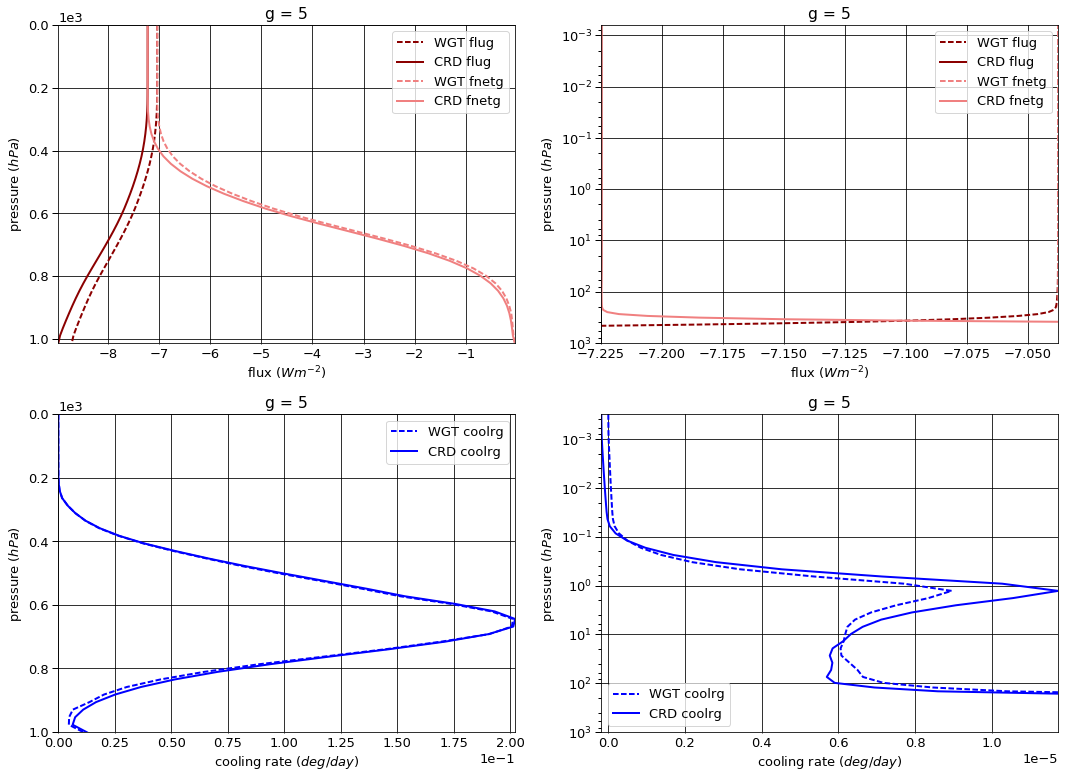

# Figure: flux, cooling rate g-group 6

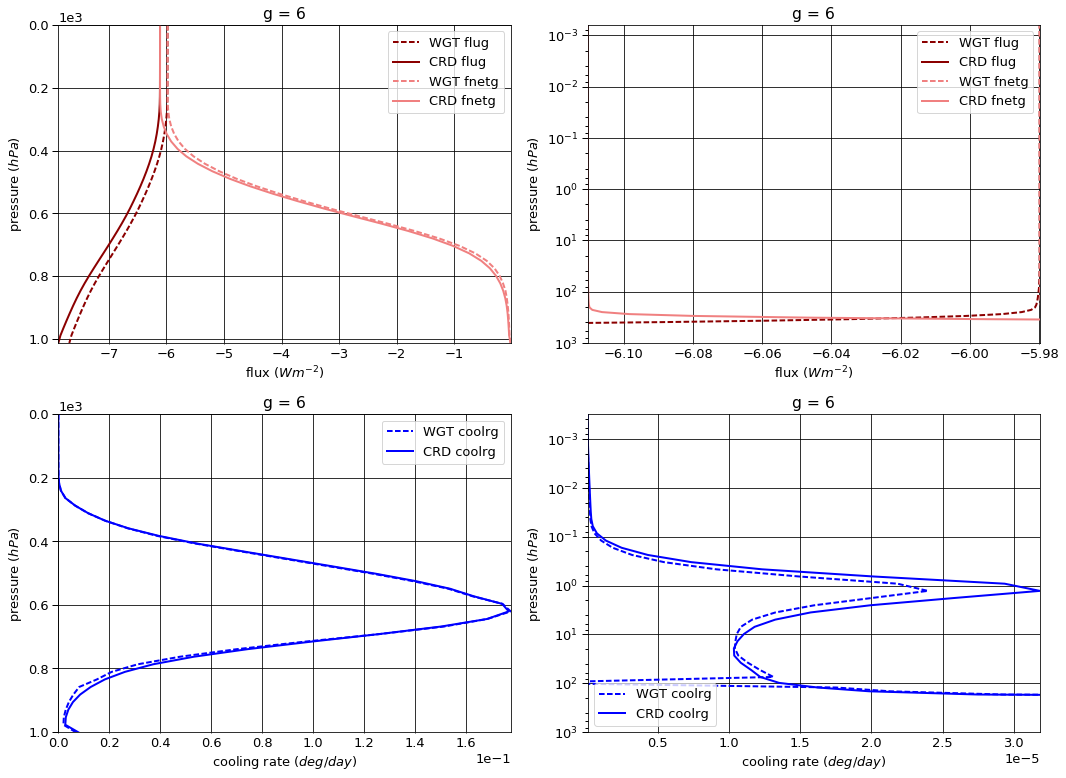

# Figure: flux, cooling rate g-group 7

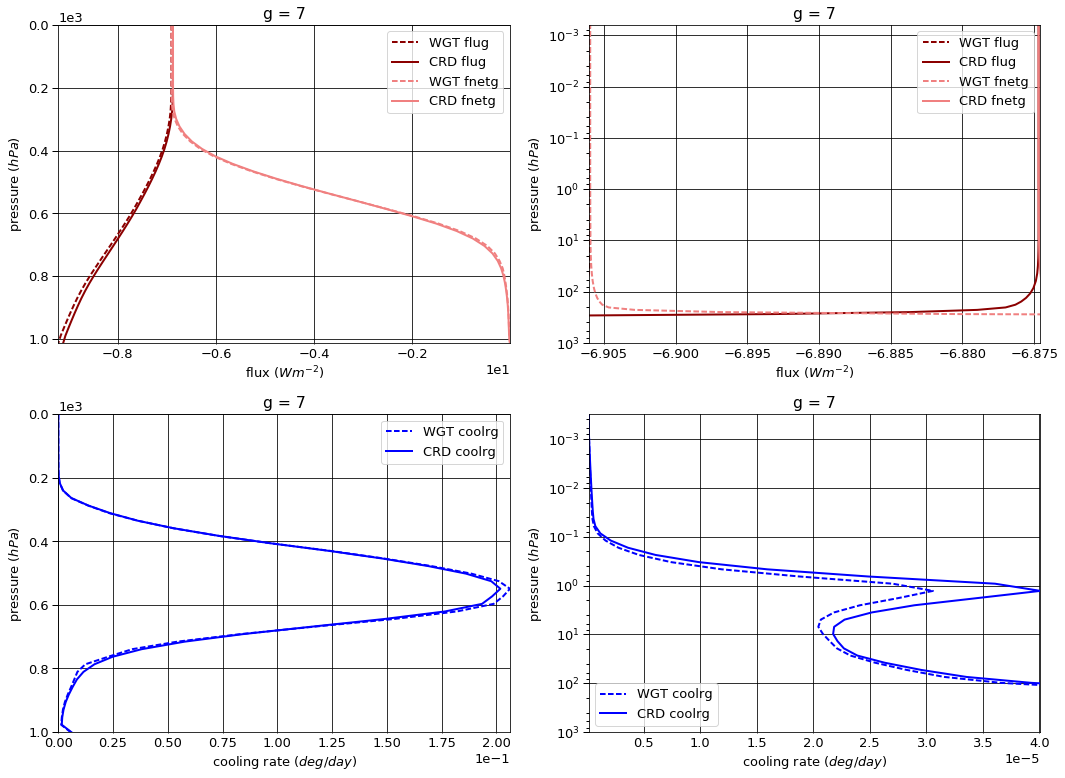

# Figure: flux, cooling rate g-group 8

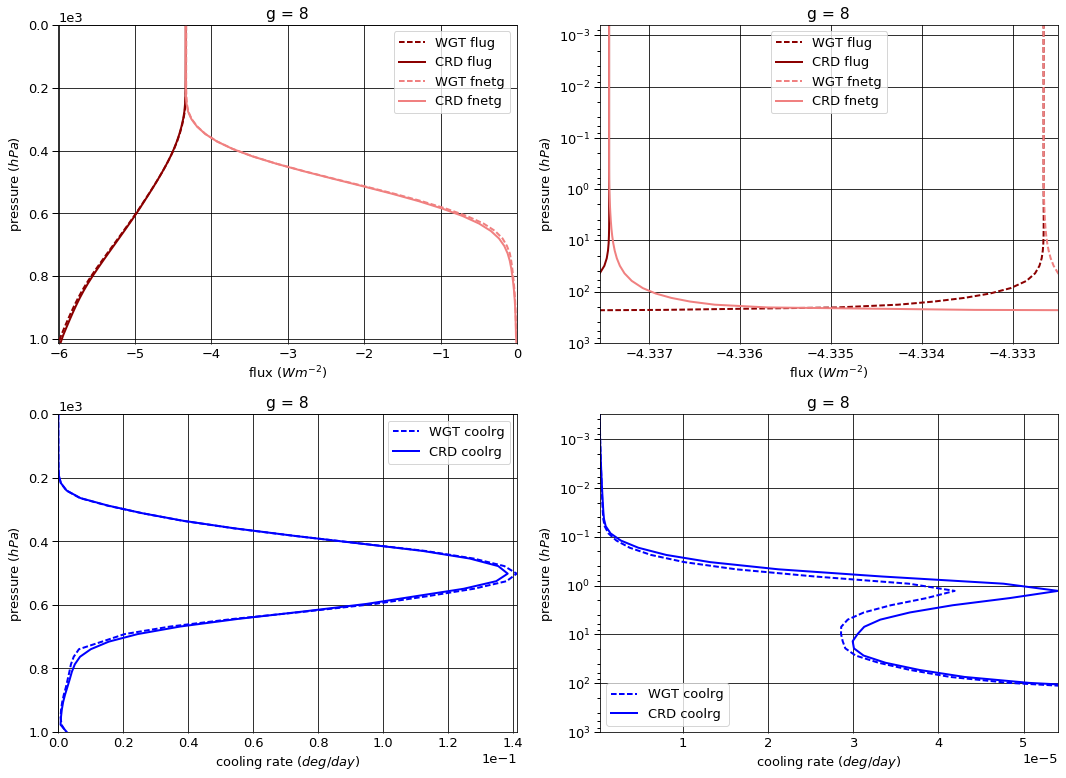

# Figure: flux, cooling rate g-group 9

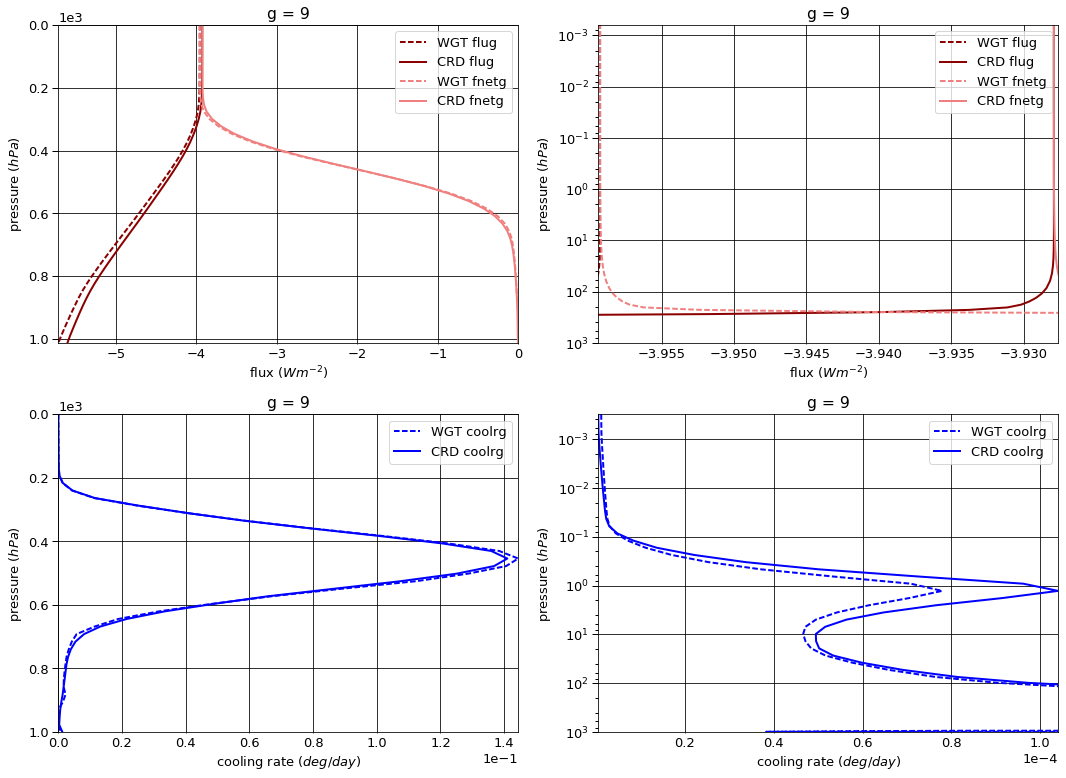

# Figure: flux, cooling rate g-group 10

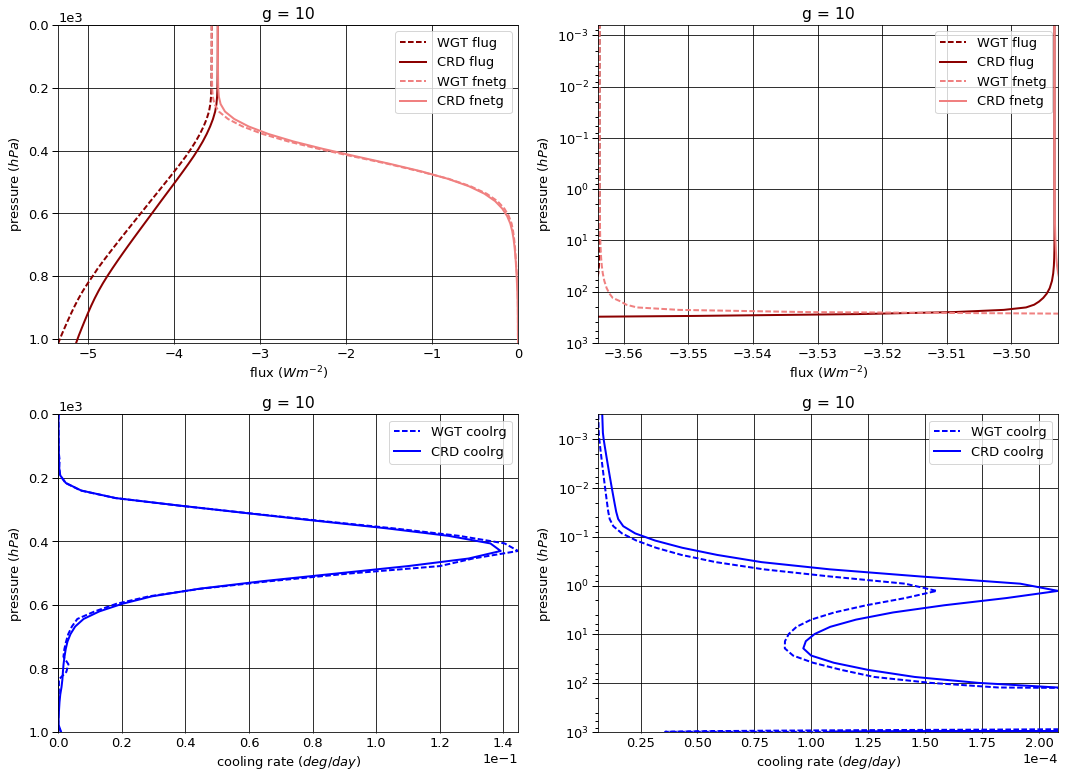

# Figure: flux, cooling rate g-group 11

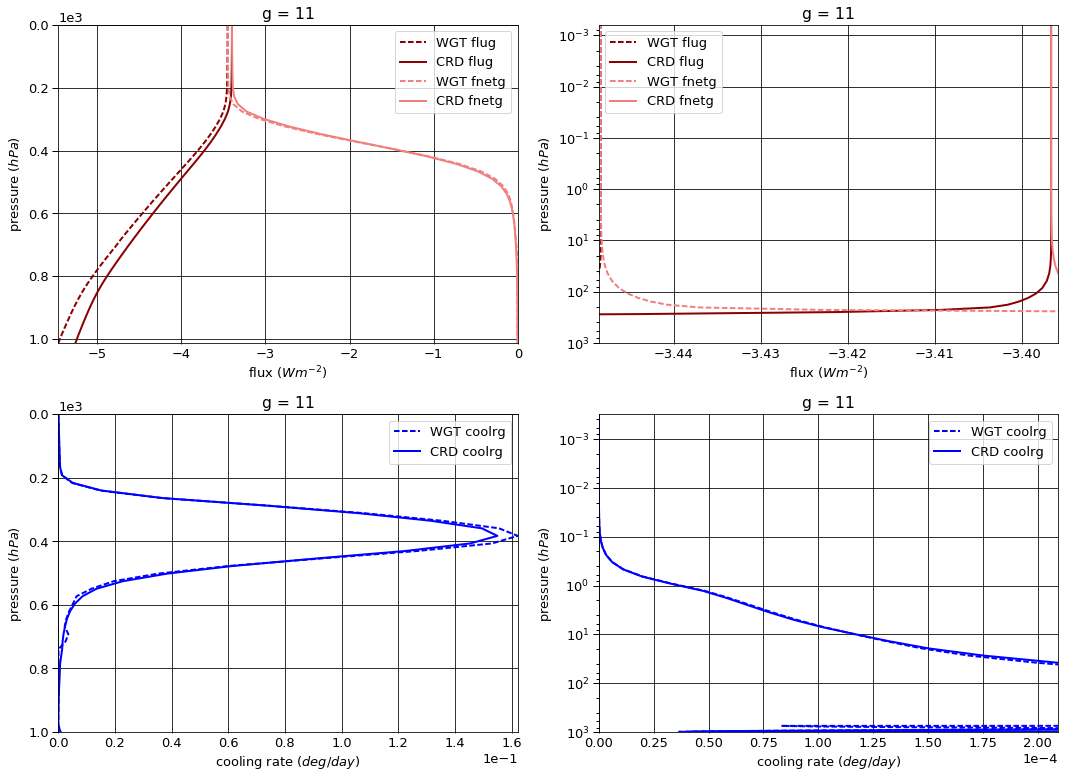

# Figure: flux, cooling rate g-group 12

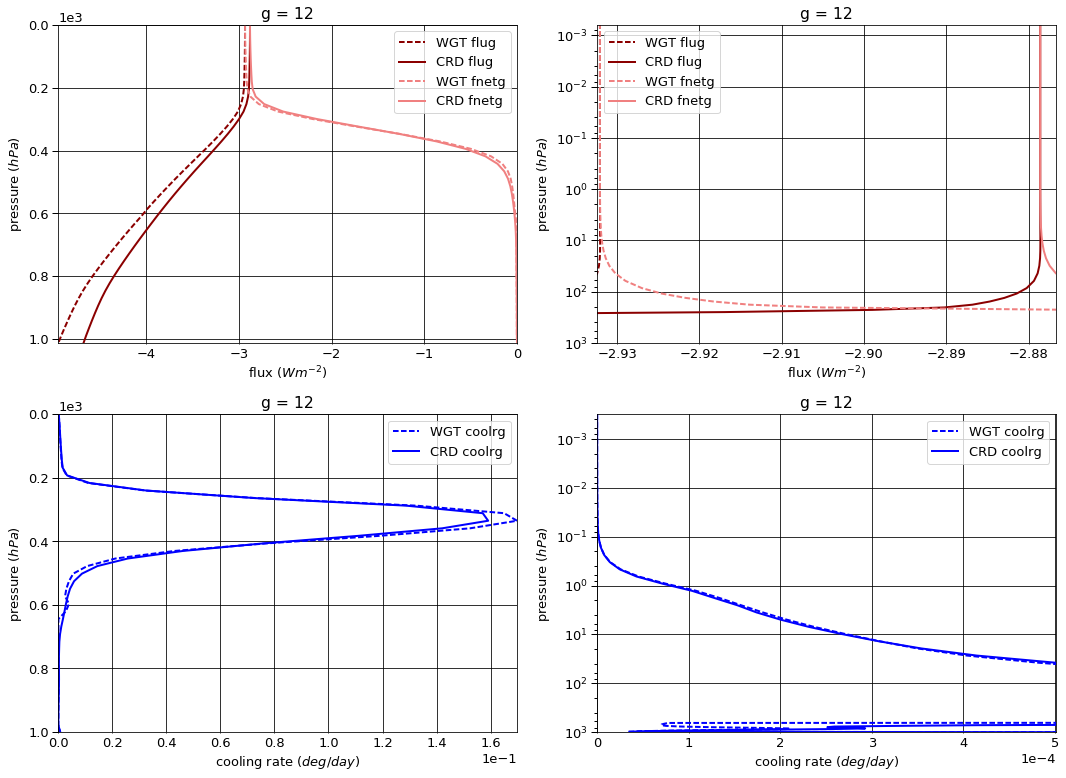

# Figure: flux, cooling rate g-group 13

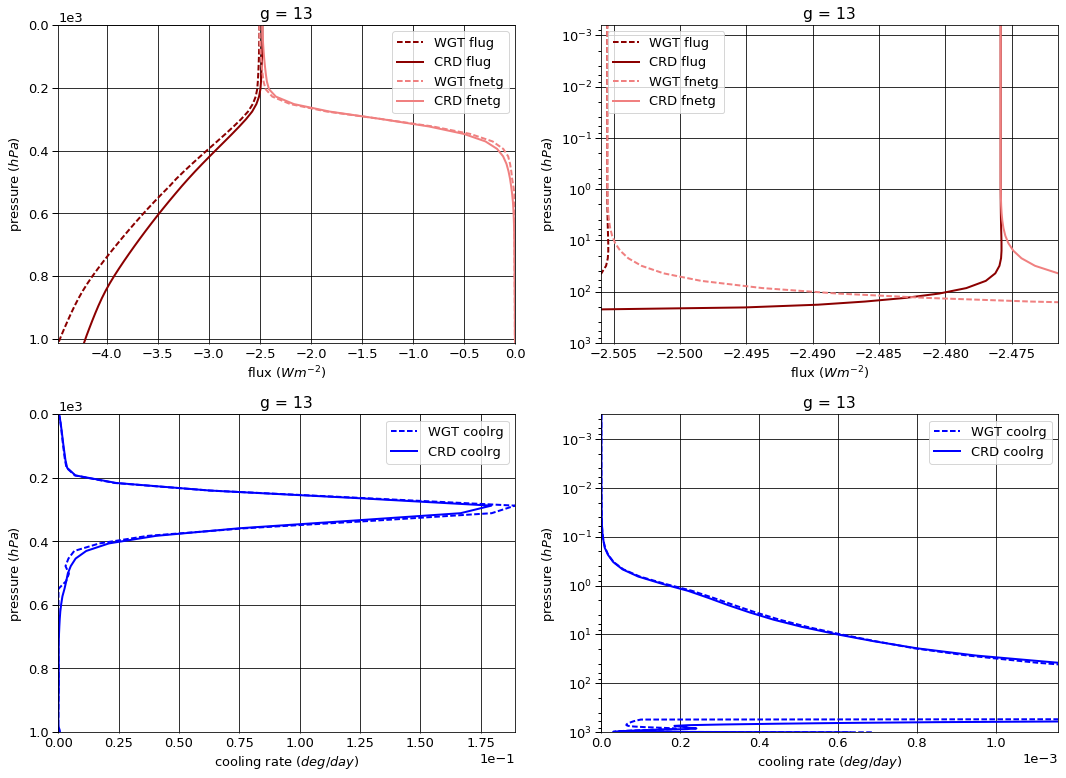

# Figure: flux, cooling rate g-group 14

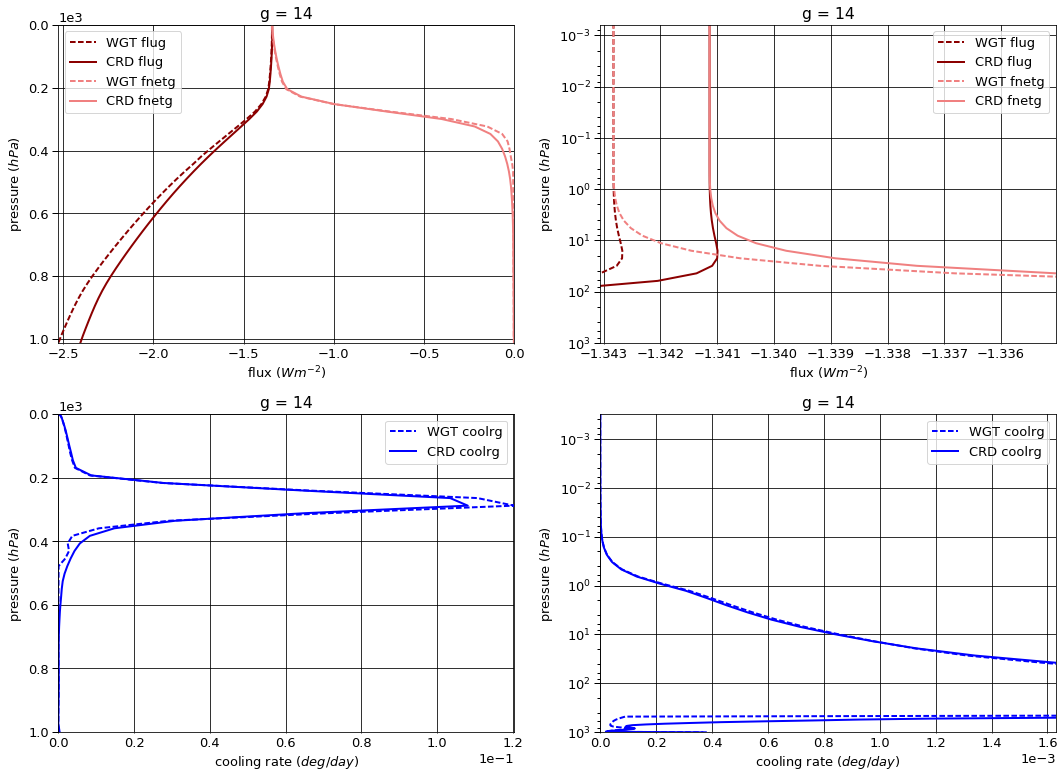

# Figure: flux, cooling rate g-group 15

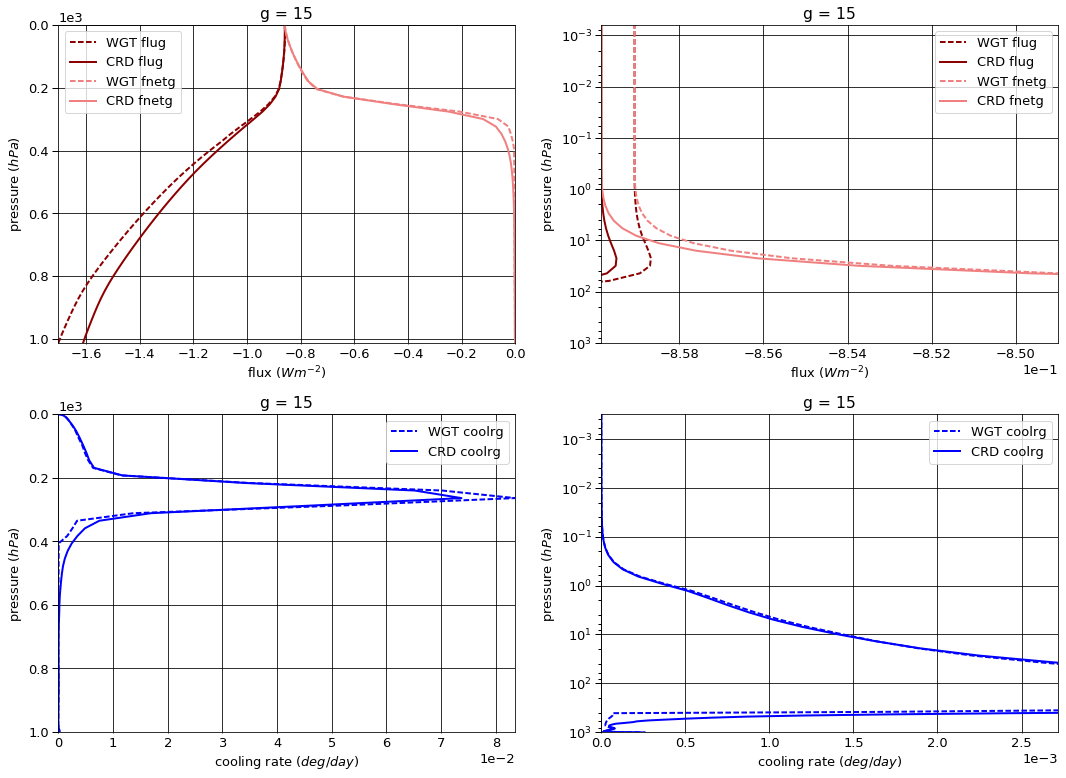

# Figure: flux, cooling rate g-group 16

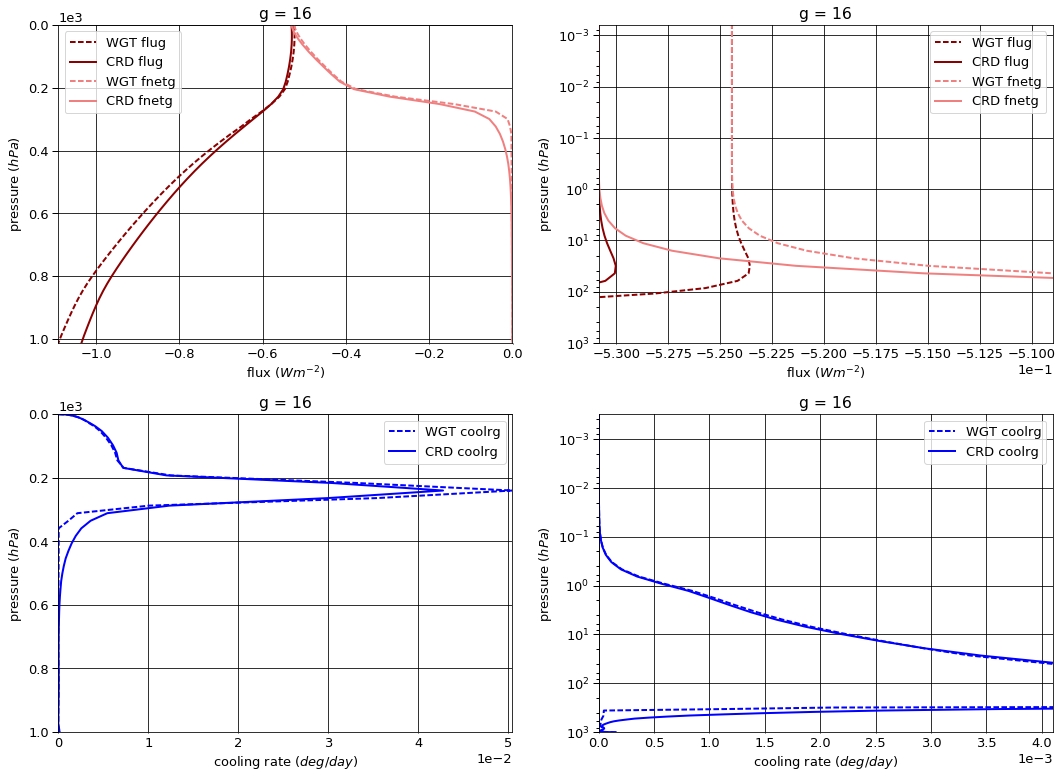

# Figure: flux, cooling rate g-group 17

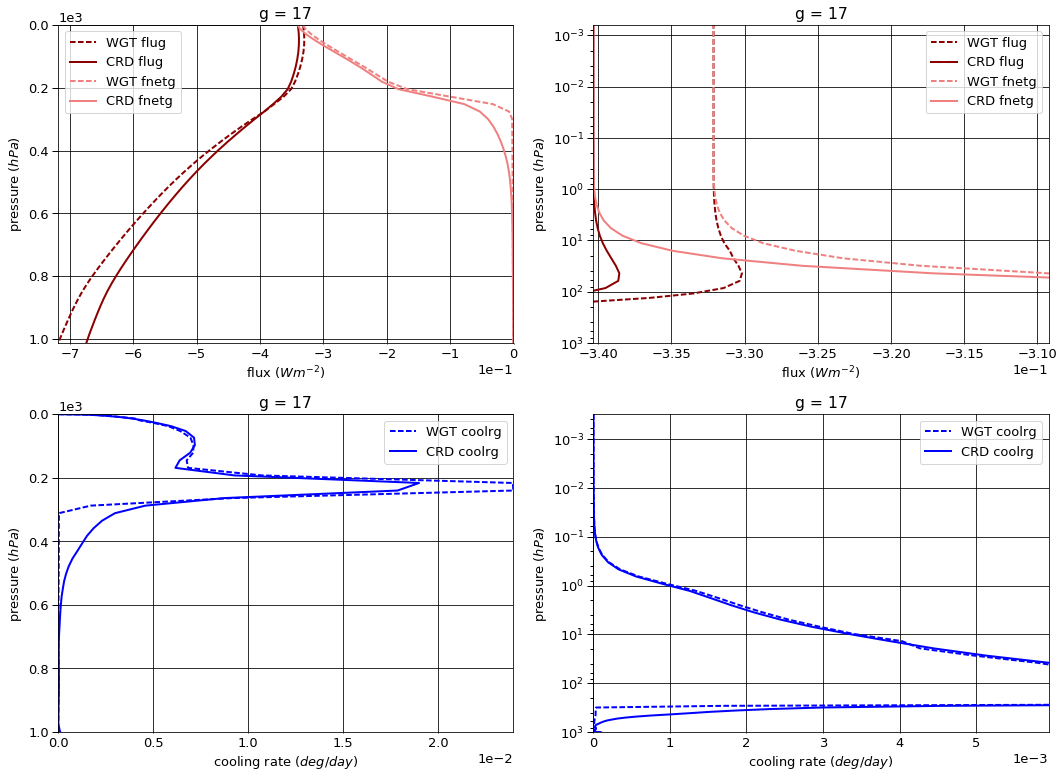

# Figure: flux, cooling rate g-group 18

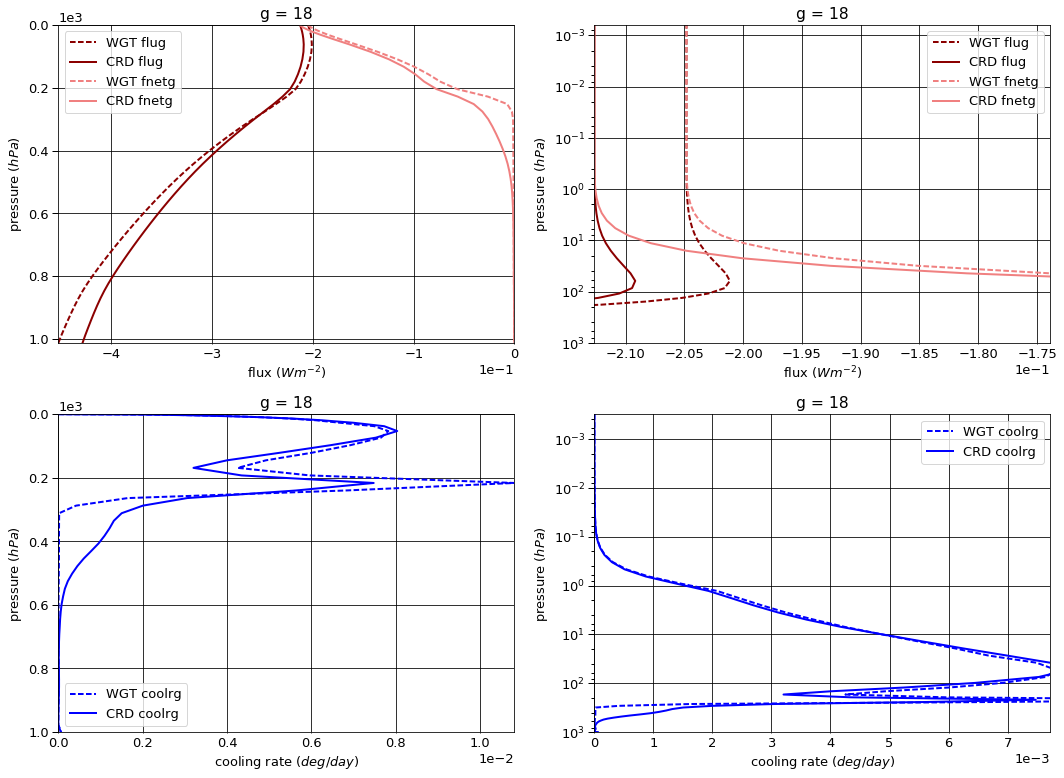

# Figure: flux, cooling rate g-group 19

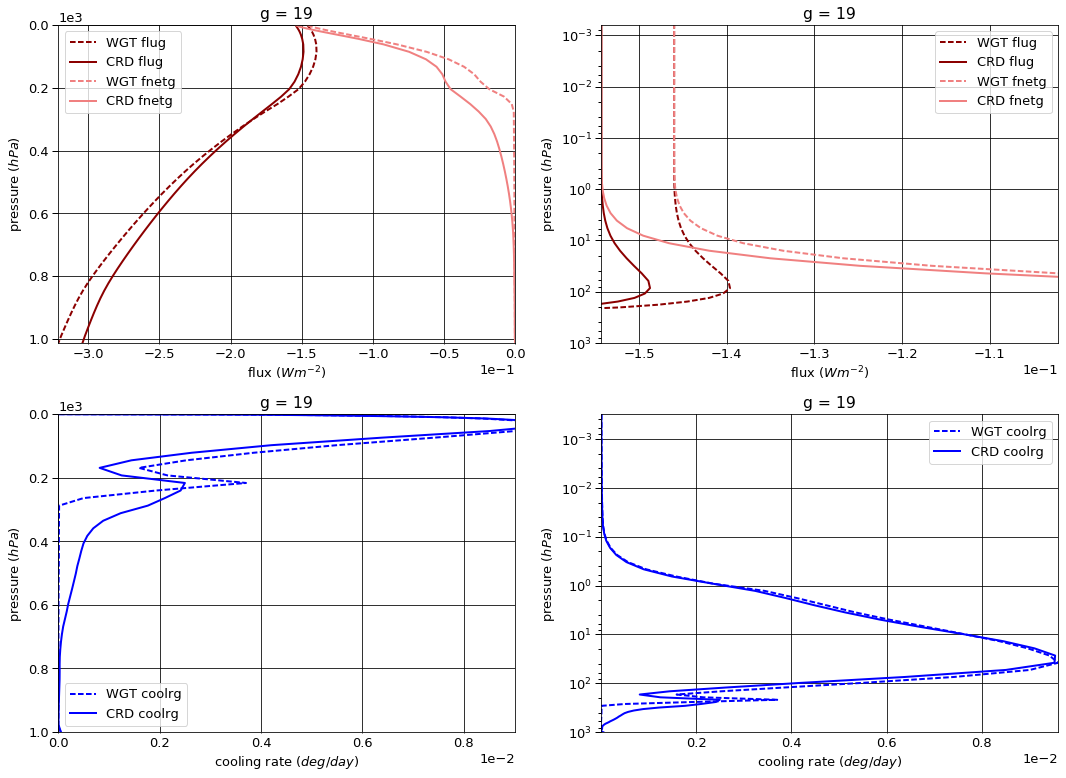

# Figure: flux, cooling rate g-group 20

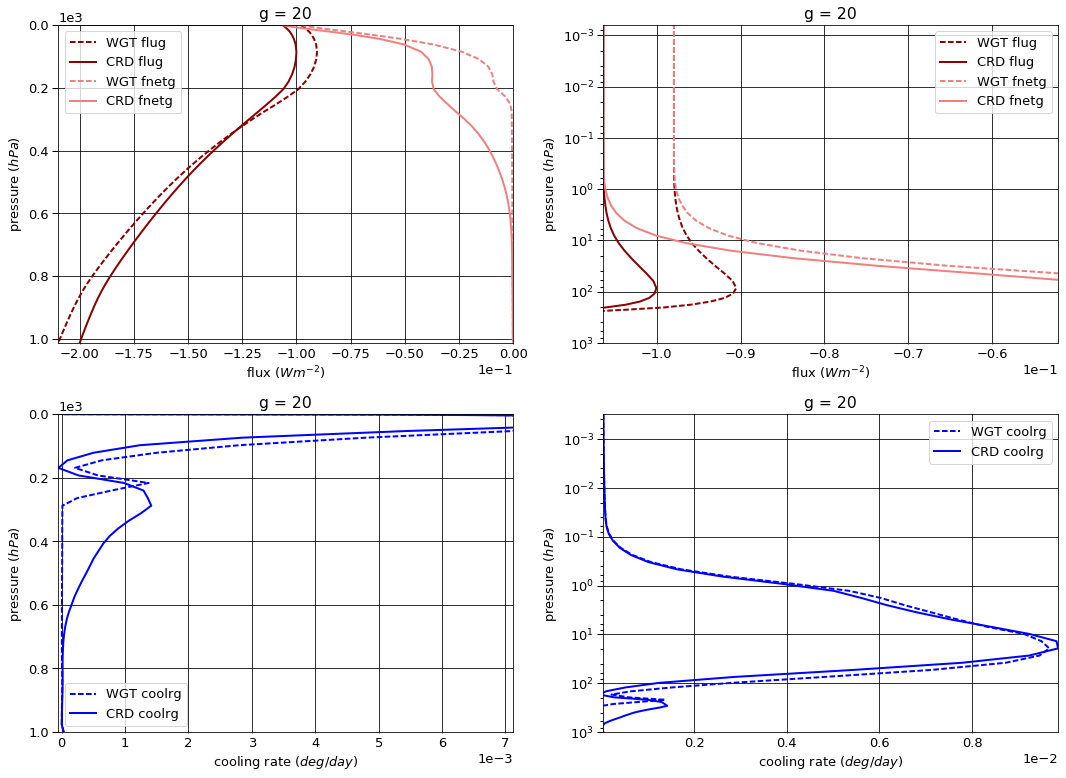

# Figure: flux, cooling rate g-group 21

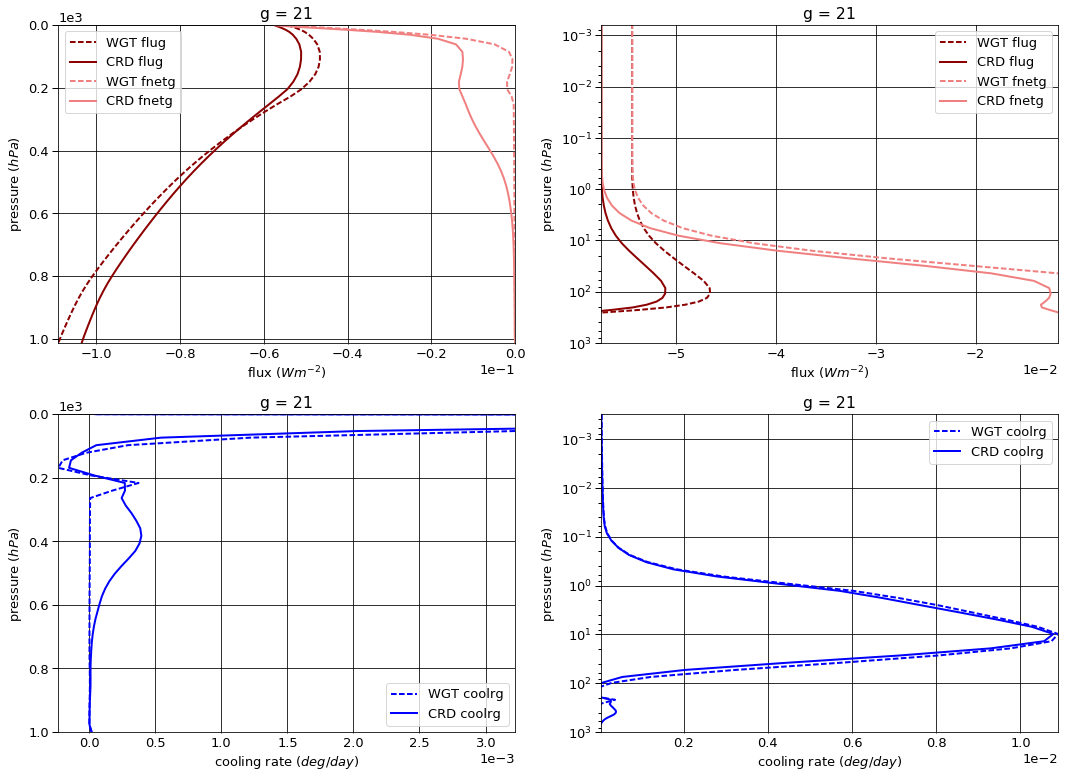

# Figure: flux, cooling rate g-group 22

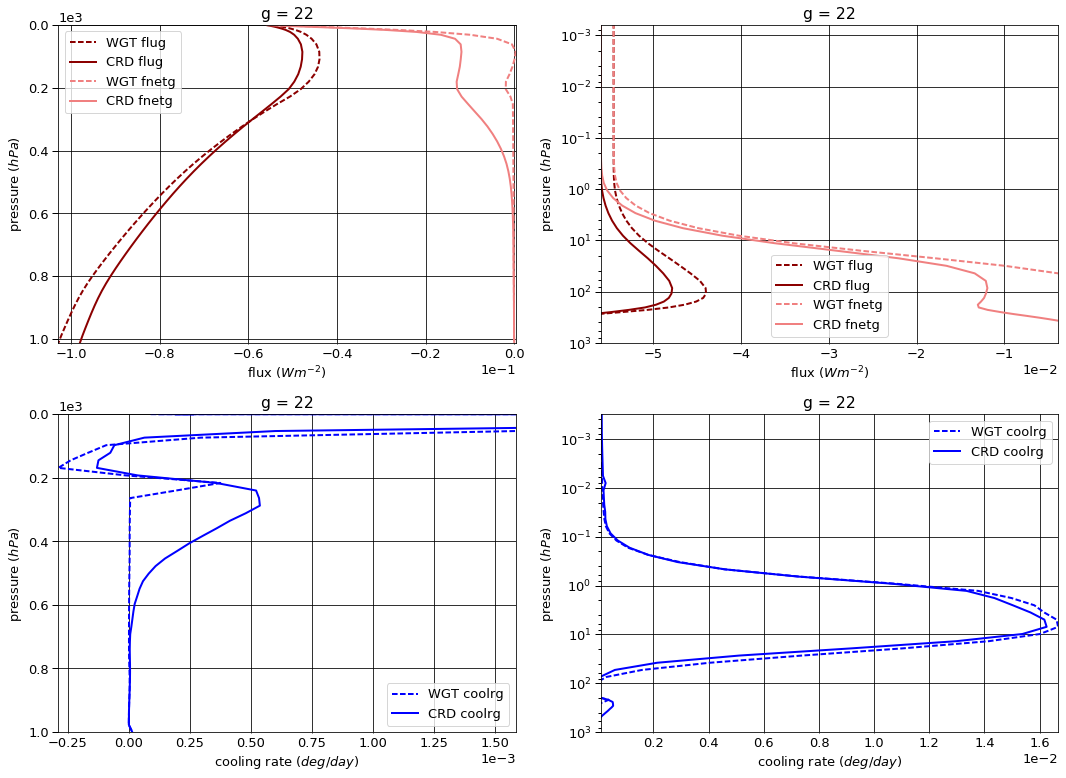

# Figure: flux, cooling rate g-group 23

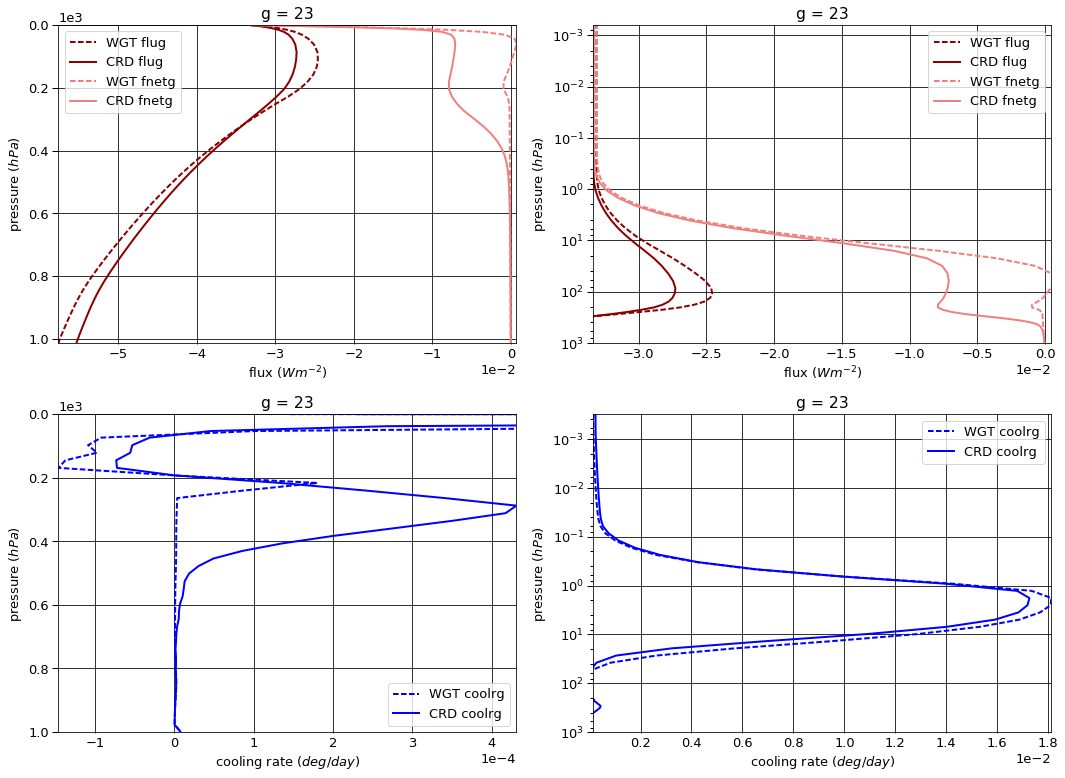

# Figure: flux, cooling rate g-group 24

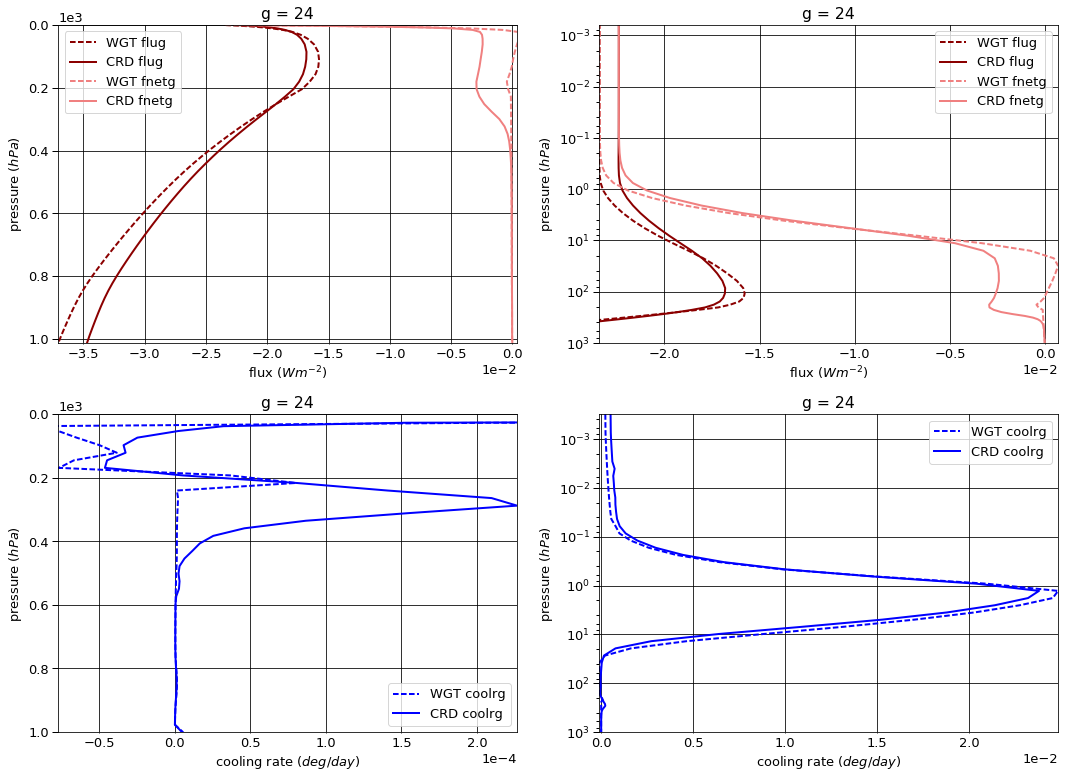

# Figure: flux, cooling rate g-group 25

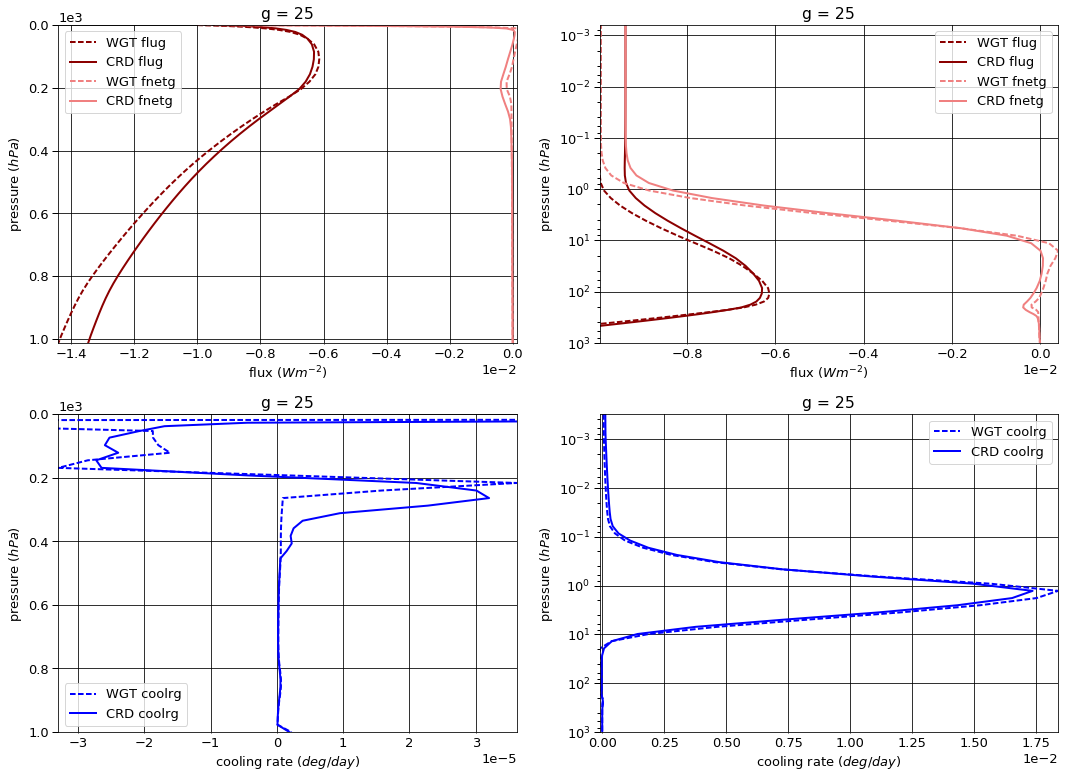

# Figure: flux, cooling rate g-group 26

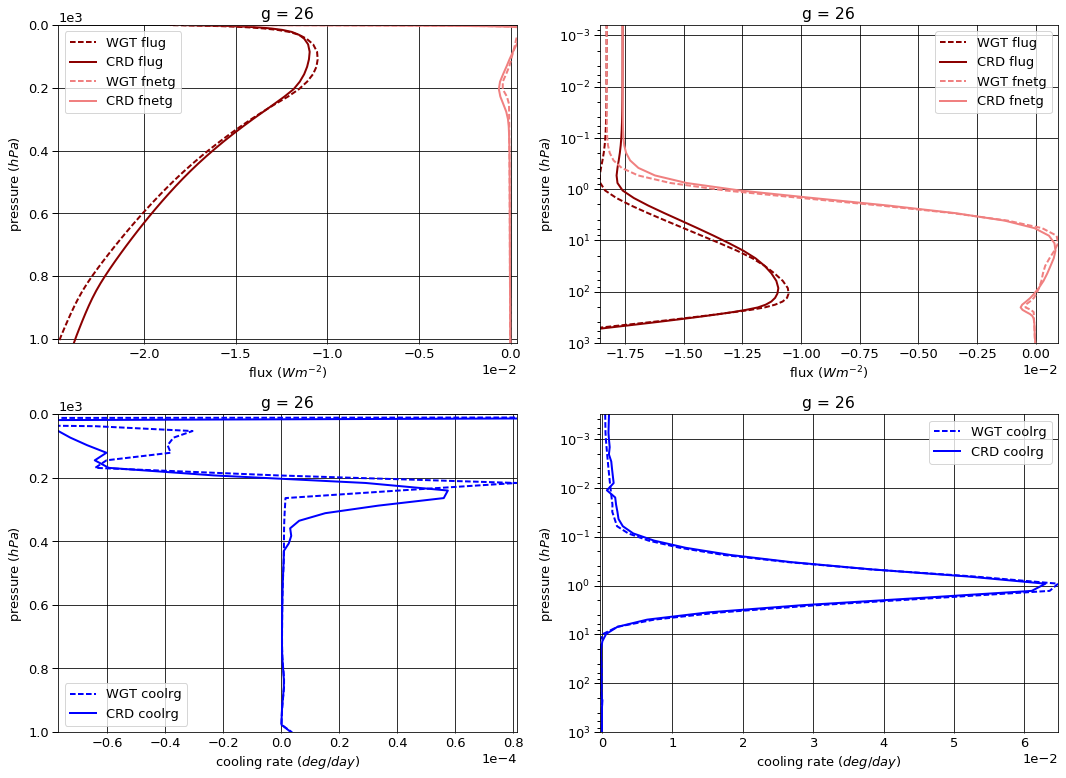

# Figure: flux, cooling rate g-group 27

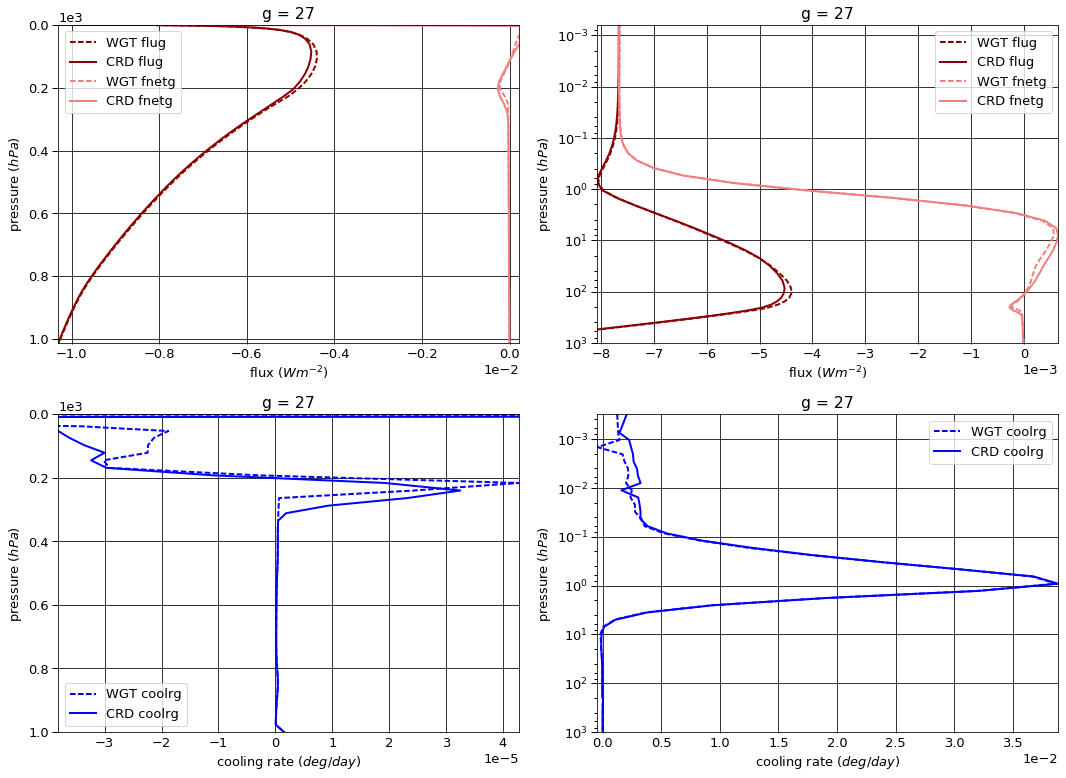

# Figure: flux, cooling rate g-group 28

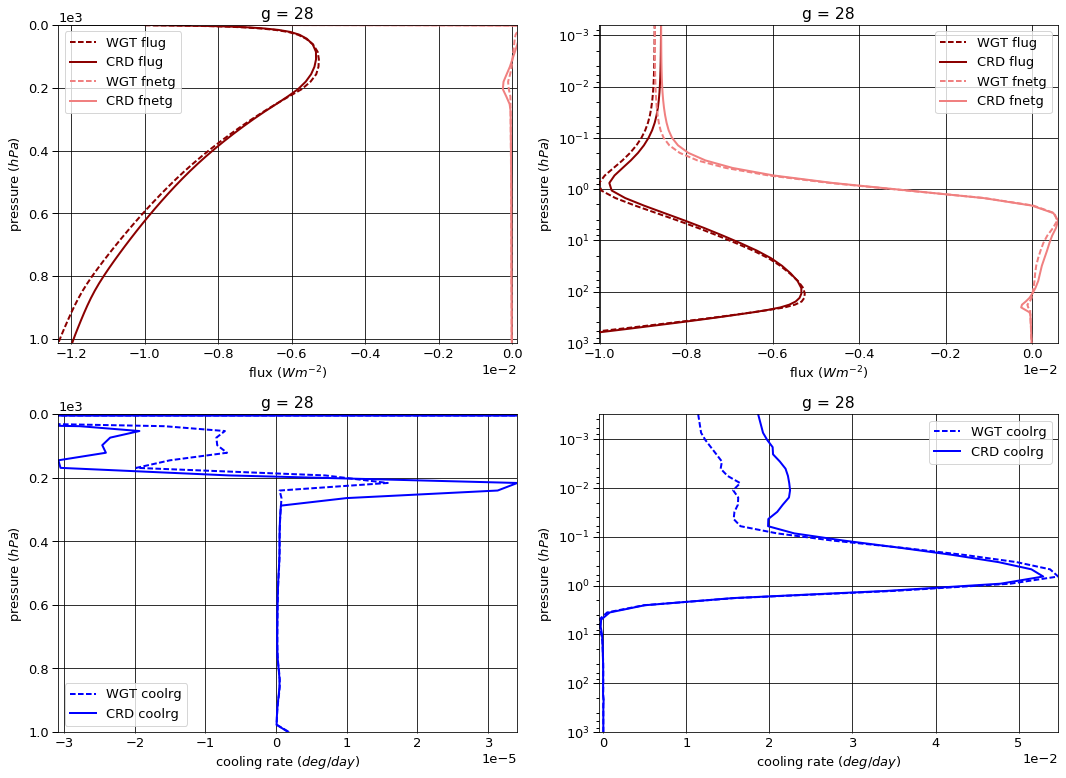

# Figure: flux, cooling rate g-group 29

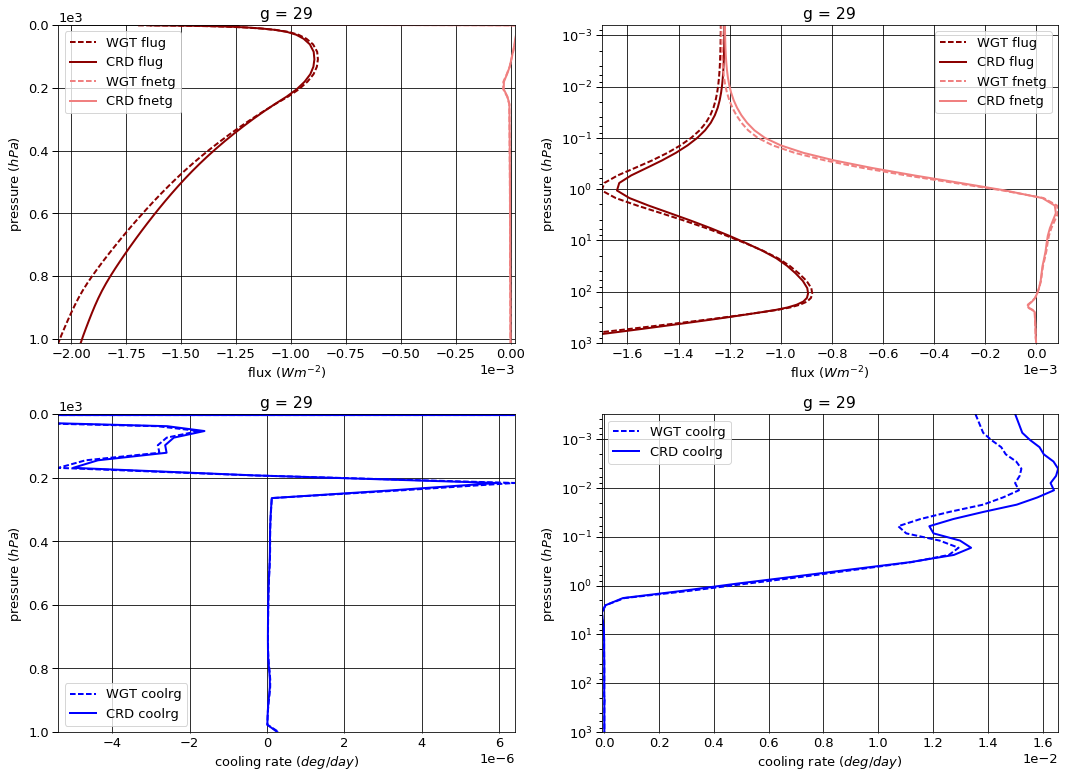

# Figure: flux, cooling rate g-group 30

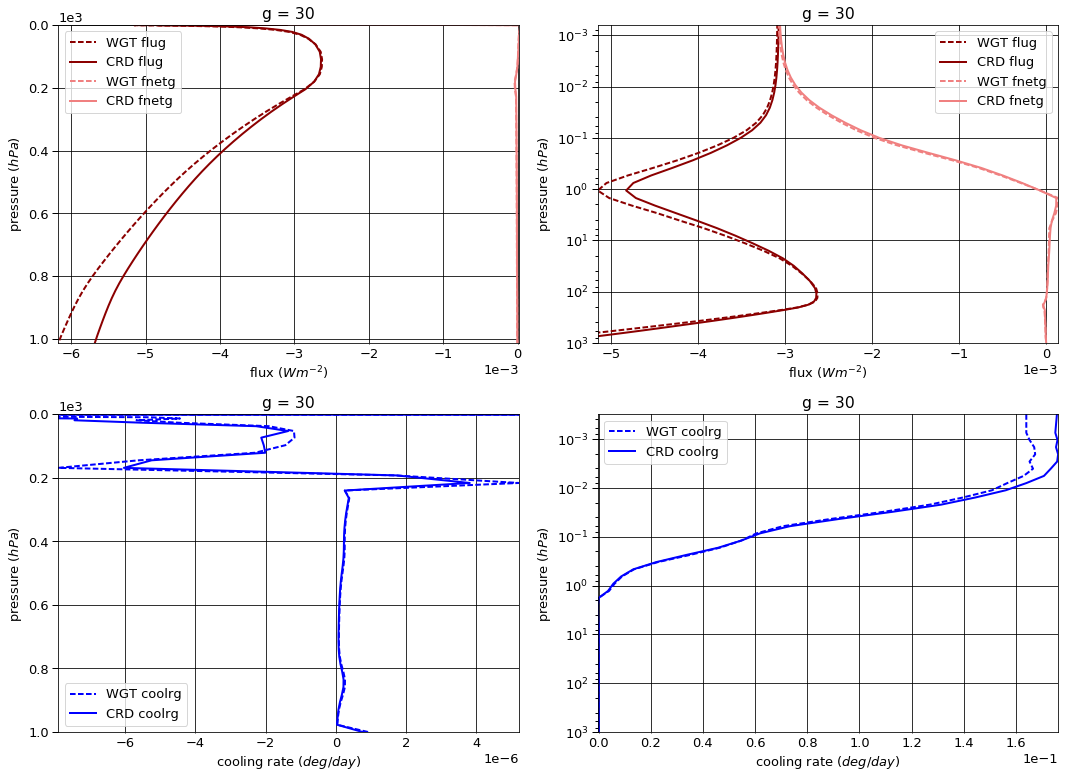

# Figure: flux, cooling rate g-group total

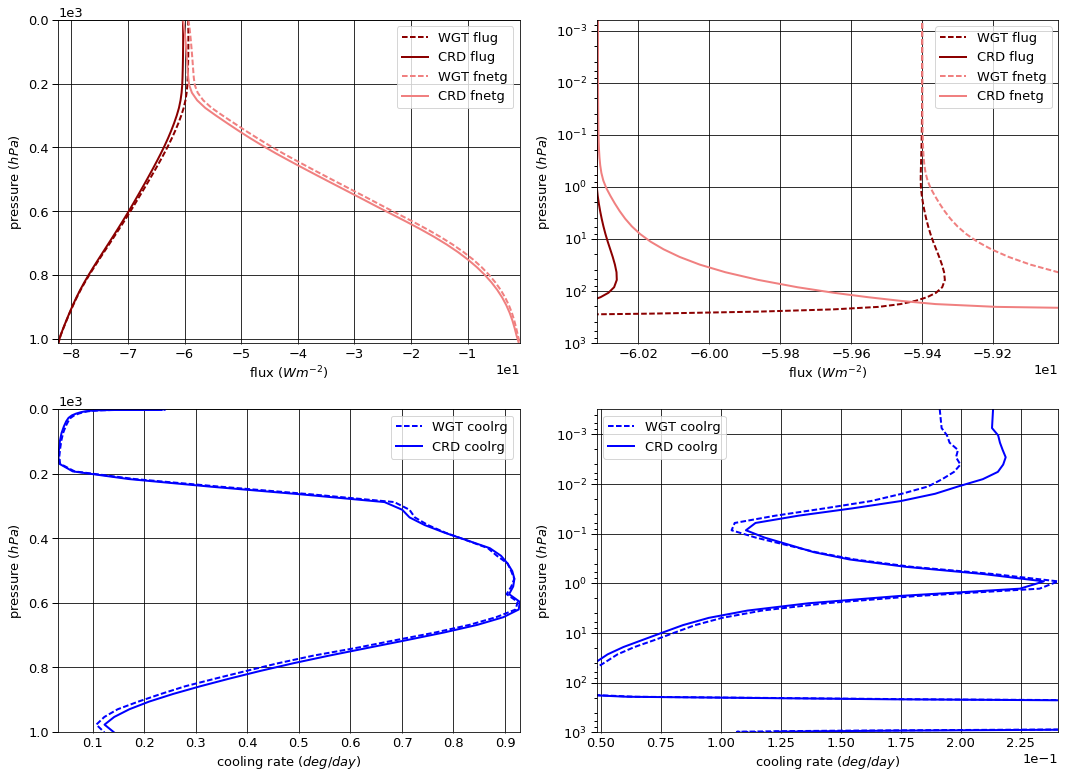

In [16]:
matplotlib.rcParams.update({'font.size': 13,
                            'grid.color': 'black',
                            'axes.facecolor': 'white',
                            'axes.edgecolor': 'black',
                            'ytick.direction': 'out',
                            'ytick.major.size': 6, 'ytick.major.width': 1,
                            'ytick.minor.size': 3, 'ytick.minor.width': 1,
                            'xtick.direction': 'out',
                            'xtick.major.size': 6, 'xtick.major.size': 1,
                            'xtick.minor.size': 3, 'xtick.minor.size': 1}) 

fig.plot(analysis)


In [17]:
table_fluxg.display_withdiff(analysis, benchmark='crd')
table_coolrg.display_withdiff(analysis, benchmark='crd')
table_flux.display_withdiff(analysis, benchmark='crd')
table_coolr.display_withdiff(analysis, benchmark='crd')

# Table: flux. g-groups 


CRD


flug      fldg         fnetg
g  pressure level                                  
1  0.0      1     -1.959135  0.000000 -1.959135e+00
   1013.0   76    -2.140636  1.717561 -4.230754e-01
2  0.0      1     -2.646566  0.000000 -2.646566e+00
   1013.0   76    -2.988454  2.769194 -2.192601e-01
3  0.0      1     -4.600626  0.000000 -4.600626e+00
   1013.0   76    -5.361111  5.210850 -1.502612e-01
4  0.0      1     -6.626244  0.000000 -6.626244e+00
   1013.0   76    -7.976655  7.908774 -6.788059e-02
5  0.0      1     -7.224754  0.000000 -7.224754e+00
   1013.0   76    -8.972622  8.931236 -4.138574e-02
6  0.0      1     -6.110440  0.000000 -6.110440e+00
   1013.0   76    -7.877263  7.854429 -2.283470e-02
7  0.0      1     -6.874689  0.000000 -6.874689e+00
   1013.0   76    -9.110121  9.093997 -1.612393e-02
8  0.0      1     -4.337441  0.000000 -4.337441e+00
   1013.0   76    -5.976566  5.969558 -7.007995e-03
9  0.0      1     -3.927909  0.000000 -3.927909e+00
   1013.0   76    -5.604350  5.600819 -3.531064e-03
10 0.0      1     -3.493284  0.000000 -3.493284e+00
   1013.0   76    -5.139824  5.137244 -2.579892e-03
11 0.0      1     -3.396653  0.000000 -3.396653e+00
   1013.0   76    -5.256109  5.253919 -2.189738e-03
12 0.0      1     -2.878581  0.000000 -2.878581e+00
   1013.0   76    -4.671707  4.669753 -1.954025e-03
13 0.0      1     -2.475831  0.000000 -2.475831e+00
   1013.0   76    -4.222572  4.220827 -1.745160e-03
14 0.0      1     -1.341135  0.000000 -1.341135e+00
   1013.0   76    -2.405236  2.404226 -1.010034e-03
15 0.0      1     -0.859851  0.000000 -8.598509e-01
   1013.0   76    -1.611754  1.611096 -6.579480e-04
16 0.0      1     -0.530841  0.000000 -5.308412e-01
   1013.0   76    -1.035191  1.034768 -4.234175e-04
17 0.0      1     -0.340326  0.000000 -3.403263e-01
   1013.0   76    -0.674061  0.673783 -2.779020e-04
18 0.0      1     -0.212645  0.000000 -2.126447e-01
   1013.0   76    -0.428727  0.428555 -1.721442e-04
19 0.0      1     -0.154318  0.000000 -1.543178e-01
   1013.0   76    -0.304067  0.303915 -1.516941e-04
20 0.0      1     -0.106353  0.000000 -1.063531e-01
   1013.0   76    -0.200034  0.199946 -8.895841e-05
21 0.0      1     -0.057522  0.000000 -5.752163e-02
   1013.0   76    -0.103499  0.103445 -5.326837e-05
22 0.0      1     -0.055962  0.000000 -5.596154e-02
   1013.0   76    -0.098037  0.097995 -4.186033e-05
23 0.0      1     -0.033353  0.000000 -3.335332e-02
   1013.0   76    -0.055312  0.055289 -2.254984e-05
24 0.0      1     -0.022386  0.000000 -2.238590e-02
   1013.0   76    -0.034704  0.034690 -1.381423e-05
25 0.0      1     -0.009395  0.000000 -9.395201e-03
   1013.0   76    -0.013460  0.013455 -5.352831e-06
26 0.0      1     -0.017609  0.000000 -1.760930e-02
   1013.0   76    -0.023846  0.023836 -9.709426e-06
27 0.0      1     -0.007665  0.000000 -7.665131e-03
   1013.0   76    -0.010302  0.010297 -4.352271e-06
28 0.0      1     -0.008580  0.000000 -8.579614e-03
   1013.0   76    -0.011971  0.011966 -4.895932e-06
29 0.0      1     -0.001220  0.000000 -1.219689e-03
   1013.0   76    -0.001956  0.001955 -7.709598e-07
30 0.0      1     -0.003074  0.000000 -3.073616e-03
   1013.0   76    -0.005683  0.005681 -2.192051e-06


WGT


flug      fldg         fnetg
g  pressure level                                  
1  0.0      1     -1.811436  0.000000 -1.811436e+00
   1013.0   76    -1.959117  1.591487 -3.676302e-01
2  0.0      1     -2.472401  0.000000 -2.472401e+00
   1013.0   76    -2.761696  2.592183 -1.695135e-01
3  0.0      1     -4.331138  0.000000 -4.331138e+00
   1013.0   76    -4.988339  4.880228 -1.081113e-01
4  0.0      1     -6.398057  0.000000 -6.398057e+00
   1013.0   76    -7.657430  7.608303 -4.912726e-02
5  0.0      1     -7.037540  0.000000 -7.037540e+00
   1013.0   76    -8.709015  8.675146 -3.386871e-02
6  0.0      1     -5.979846  0.000000 -5.979846e+00
   1013.0   76    -7.686241  7.667712 -1.852843e-02
7  0.0      1     -6.905957  0.000000 -6.905957e+00
   1013.0   76    -9.209083  9.194337 -1.474686e-02
8  0.0      1     -4.332663  0.000000 -4.332663e+00
   1013.0   76    -6.004940  6.000079 -4.860798e-03
9  0.0      1     -3.959247  0.000000 -3.959247e+00
   1013.0   76    -5.716834  5.714391 -2.443021e-03
10 0.0      1     -3.563774  0.000000 -3.563774e+00
   1013.0   76    -5.346413  5.344128 -2.284726e-03
11 0.0      1     -3.448397  0.000000 -3.448397e+00
   1013.0   76    -5.459597  5.457264 -2.333094e-03
12 0.0      1     -2.932081  0.000000 -2.932081e+00
   1013.0   76    -4.943065  4.940953 -2.112360e-03
13 0.0      1     -2.505480  0.000000 -2.505480e+00
   1013.0   76    -4.473865  4.471954 -1.911853e-03
14 0.0      1     -1.342828  0.000000 -1.342828e+00
   1013.0   76    -2.527096  2.526016 -1.079924e-03
15 0.0      1     -0.859063  0.000000 -8.590629e-01
   1013.0   76    -1.703938  1.703210 -7.281575e-04
16 0.0      1     -0.524430  0.000000 -5.244299e-01
   1013.0   76    -1.090685  1.090219 -4.660911e-04
17 0.0      1     -0.332125  0.000000 -3.321254e-01
   1013.0   76    -0.718206  0.717899 -3.069166e-04
18 0.0      1     -0.204815  0.000000 -2.048151e-01
   1013.0   76    -0.452737  0.452544 -1.934718e-04
19 0.0      1     -0.146013  0.000000 -1.460131e-01
   1013.0   76    -0.321032  0.320895 -1.371891e-04
20 0.0      1     -0.097938  0.000000 -9.793832e-02
   1013.0   76    -0.209905  0.209816 -8.970056e-05
21 0.0      1     -0.054439  0.000000 -5.443863e-02
   1013.0   76    -0.109068  0.109022 -4.660911e-05
22 0.0      1     -0.054503  0.000000 -5.450269e-02
   1013.0   76    -0.102895  0.102851 -4.397086e-05
23 0.0      1     -0.033121  0.000000 -3.312127e-02
   1013.0   76    -0.057621  0.057596 -2.462368e-05
24 0.0      1     -0.023387  0.000000 -2.338654e-02
   1013.0   76    -0.037042  0.037026 -1.582951e-05
25 0.0      1     -0.009956  0.000000 -9.955876e-03
   1013.0   76    -0.014405  0.014399 -6.155921e-06
26 0.0      1     -0.018291  0.000000 -1.829138e-02
   1013.0   76    -0.024695  0.024684 -1.055301e-05
27 0.0      1     -0.007655  0.000000 -7.654625e-03
   1013.0   76    -0.010289  0.010285 -4.397086e-06
28 0.0      1     -0.008726  0.000000 -8.726259e-03
   1013.0   76    -0.012347  0.012342 -5.276503e-06
29 0.0      1     -0.001234  0.000000 -1.233915e-03
   1013.0   76    -0.002058  0.002057 -8.794172e-07
30 0.0      1     -0.003089  0.000000 -3.088760e-03
   1013.0   76    -0.006174  0.006171 -2.638252e-06


WGT - CRD


flug      fldg         fnetg
g  pressure level                                  
1  0.0      1      0.147699  0.000000  1.476990e-01
   1013.0   76     0.181519 -0.126074  5.544523e-02
2  0.0      1      0.174166  0.000000  1.741656e-01
   1013.0   76     0.226758 -0.177012  4.974664e-02
3  0.0      1      0.269489  0.000000  2.694887e-01
   1013.0   76     0.372772 -0.330622  4.214986e-02
4  0.0      1      0.228187  0.000000  2.281865e-01
   1013.0   76     0.319225 -0.300472  1.875333e-02
5  0.0      1      0.187214  0.000000  1.872139e-01
   1013.0   76     0.263607 -0.256090  7.517031e-03
6  0.0      1      0.130595  0.000000  1.305946e-01
   1013.0   76     0.191023 -0.186716  4.306270e-03
7  0.0      1     -0.031268  0.000000 -3.126760e-02
   1013.0   76    -0.098962  0.100340  1.377076e-03
8  0.0      1      0.004778  0.000000  4.778000e-03
   1013.0   76    -0.028373  0.030520  2.147197e-03
9  0.0      1     -0.031338  0.000000 -3.133770e-02
   1013.0   76    -0.112484  0.113572  1.088043e-03
10 0.0      1     -0.070491  0.000000 -7.049050e-02
   1013.0   76    -0.206589  0.206885  2.951657e-04
11 0.0      1     -0.051744  0.000000 -5.174420e-02
   1013.0   76    -0.203489  0.203345 -1.433559e-04
12 0.0      1     -0.053500  0.000000 -5.350020e-02
   1013.0   76    -0.271358  0.271200 -1.583350e-04
13 0.0      1     -0.029649  0.000000 -2.964880e-02
   1013.0   76    -0.251293  0.251127 -1.666933e-04
14 0.0      1     -0.001693  0.000000 -1.693200e-03
   1013.0   76    -0.121860  0.121790 -6.989020e-05
15 0.0      1      0.000788  0.000000  7.879800e-04
   1013.0   76    -0.092184  0.092114 -7.020950e-05
16 0.0      1      0.006411  0.000000  6.411320e-03
   1013.0   76    -0.055493  0.055451 -4.267361e-05
17 0.0      1      0.008201  0.000000  8.200840e-03
   1013.0   76    -0.044145  0.044116 -2.901459e-05
18 0.0      1      0.007830  0.000000  7.829620e-03
   1013.0   76    -0.024010  0.023988 -2.132764e-05
19 0.0      1      0.008305  0.000000  8.304690e-03
   1013.0   76    -0.016965  0.016979  1.450504e-05
20 0.0      1      0.008415  0.000000  8.414750e-03
   1013.0   76    -0.009871  0.009870 -7.421470e-07
21 0.0      1      0.003083  0.000000  3.082995e-03
   1013.0   76    -0.005570  0.005576  6.659257e-06
22 0.0      1      0.001459  0.000000  1.458848e-03
   1013.0   76    -0.004858  0.004856 -2.110533e-06
23 0.0      1      0.000232  0.000000  2.320450e-04
   1013.0   76    -0.002309  0.002307 -2.073845e-06
24 0.0      1     -0.001001  0.000000 -1.000640e-03
   1013.0   76    -0.002339  0.002336 -2.015284e-06
25 0.0      1     -0.000561  0.000000 -5.606758e-04
   1013.0   76    -0.000945  0.000945 -8.030892e-07
26 0.0      1     -0.000682  0.000000 -6.820740e-04
   1013.0   76    -0.000849  0.000848 -8.435813e-07
27 0.0      1      0.000011  0.000000  1.050540e-05
   1013.0   76     0.000012 -0.000012 -4.481550e-08
28 0.0      1     -0.000147  0.000000 -1.466452e-04
   1013.0   76    -0.000377  0.000376 -3.805712e-07
29 0.0      1     -0.000014  0.000000 -1.422610e-05
   1013.0   76    -0.000102  0.000102 -1.084574e-07
30 0.0      1     -0.000015  0.000000 -1.514420e-05
   1013.0   76    -0.000491  0.000490 -4.462005e-07

# Table: cooling rate. g-groups 


CRD


coolrg
g  pressure    layer              
1  0.000312    1     -3.632466e-10
   1001.112500 75     3.194887e-02
2  0.000312    1     -2.641793e-09
   1001.112500 75     2.826344e-02
3  0.000312    1     -2.753469e-08
   1001.112500 75     2.803654e-02
4  0.000312    1     -9.350748e-08
   1001.112500 75     1.794348e-02
5  0.000312    1     -1.785252e-07
   1001.112500 75     1.267034e-02
6  0.000312    1      5.617413e-08
   1001.112500 75     7.863174e-03
7  0.000312    1      1.452146e-07
   1001.112500 75     6.068879e-03
8  0.000312    1      2.014487e-07
   1001.112500 75     2.714885e-03
9  0.000312    1      5.068461e-07
   1001.112500 75     1.354236e-03
10 0.000312    1      8.196596e-06
   1001.112500 75     9.474948e-04
11 0.000312    1      1.152783e-09
   1001.112500 75     7.933971e-04
12 0.000312    1      2.984026e-09
   1001.112500 75     7.064243e-04
13 0.000312    1      2.552933e-08
   1001.112500 75     6.310153e-04
14 0.000312    1      2.836626e-08
   1001.112500 75     3.650027e-04
15 0.000312    1      1.934048e-07
   1001.112500 75     2.377695e-04
16 0.000312    1      2.833323e-07
   1001.112500 75     1.531181e-04
17 0.000312    1      1.631766e-06
   1001.112500 75     1.004970e-04
18 0.000312    1      2.746253e-06
   1001.112500 75     6.218619e-05
19 0.000312    1      1.154627e-05
   1001.112500 75     5.414263e-05
20 0.000312    1      3.575722e-05
   1001.112500 75     3.234647e-05
21 0.000312    1      4.620734e-05
   1001.112500 75     1.936697e-05
22 0.000312    1      1.251559e-04
   1001.112500 75     1.517617e-05
23 0.000312    1      2.319071e-04
   1001.112500 75     8.145456e-06
24 0.000312    1      5.126415e-04
   1001.112500 75     4.990497e-06
25 0.000312    1      1.256541e-04
   1001.112500 75     1.933744e-06
26 0.000312    1      1.019493e-03
   1001.112500 75     3.507310e-06
27 0.000312    1      2.059782e-03
   1001.112500 75     1.571895e-06
28 0.000312    1      1.863917e-02
   1001.112500 75     1.768509e-06
29 0.000312    1      1.500111e-02
   1001.112500 75     2.785405e-07
30 0.000312    1      1.756868e-01
   1001.112500 75     7.920275e-07


WGT


coolrg
g  pressure    layer              
1  0.000312    1     -1.080734e-10
   1001.112500 75     2.949795e-02
2  0.000312    1     -8.705910e-10
   1001.112500 75     2.480035e-02
3  0.000312    1     -7.264932e-09
   1001.112500 75     2.285054e-02
4  0.000312    1     -1.785612e-08
   1001.112500 75     1.376673e-02
5  0.000312    1      3.194168e-09
   1001.112500 75     1.120798e-02
6  0.000312    1      5.463709e-08
   1001.112500 75     6.893454e-03
7  0.000312    1      1.499938e-07
   1001.112500 75     5.722561e-03
8  0.000312    1      2.237119e-07
   1001.112500 75     2.418847e-03
9  0.000312    1      1.166472e-06
   1001.112500 75     8.822732e-04
10 0.000312    1      6.453733e-06
   1001.112500 75     8.251065e-04
11 0.000312    1      9.486440e-10
   1001.112500 75     8.425741e-04
12 0.000312    1      2.425647e-09
   1001.112500 75     7.628583e-04
13 0.000312    1      2.107431e-08
   1001.112500 75     6.904471e-04
14 0.000312    1      2.202895e-08
   1001.112500 75     3.900041e-04
15 0.000312    1      1.738435e-07
   1001.112500 75     2.629670e-04
16 0.000312    1      2.367467e-07
   1001.112500 75     1.683243e-04
17 0.000312    1      1.596891e-06
   1001.112500 75     1.108399e-04
18 0.000312    1      2.712910e-06
   1001.112500 75     6.987045e-05
19 0.000312    1      1.404230e-05
   1001.112500 75     4.954450e-05
20 0.000312    1      3.522826e-05
   1001.112500 75     3.239448e-05
21 0.000312    1      5.336164e-05
   1001.112500 75     1.683243e-05
22 0.000312    1      9.028884e-05
   1001.112500 75     1.587965e-05
23 0.000312    1      1.458329e-04
   1001.112500 75     8.892603e-06
24 0.000312    1      2.270196e-04
   1001.112500 75     5.716673e-06
25 0.000312    1      5.889907e-05
   1001.112500 75     2.223151e-06
26 0.000312    1      4.752178e-04
   1001.112500 75     3.811115e-06
27 0.000312    1      1.243401e-03
   1001.112500 75     1.587965e-06
28 0.000312    1      1.142098e-02
   1001.112500 75     1.905558e-06
29 0.000312    1      1.355037e-02
   1001.112500 75     3.175930e-07
30 0.000312    1      1.639459e-01
   1001.112500 75     9.527788e-07


WGT - CRD


coolrg
g  pressure    layer              
1  0.000312    1      2.551732e-10
   1001.112500 75    -2.450913e-03
2  0.000312    1      1.771202e-09
   1001.112500 75    -3.463092e-03
3  0.000312    1      2.026976e-08
   1001.112500 75    -5.186001e-03
4  0.000312    1      7.565135e-08
   1001.112500 75    -4.176755e-03
5  0.000312    1      1.817194e-07
   1001.112500 75    -1.462363e-03
6  0.000312    1     -1.537044e-09
   1001.112500 75    -9.697196e-04
7  0.000312    1      4.779240e-09
   1001.112500 75    -3.463171e-04
8  0.000312    1      2.226312e-08
   1001.112500 75    -2.960378e-04
9  0.000312    1      6.596258e-07
   1001.112500 75    -4.719627e-04
10 0.000312    1     -1.742863e-06
   1001.112500 75    -1.223883e-04
11 0.000312    1     -2.041386e-10
   1001.112500 75     4.917704e-05
12 0.000312    1     -5.583791e-10
   1001.112500 75     5.643396e-05
13 0.000312    1     -4.455024e-09
   1001.112500 75     5.943176e-05
14 0.000312    1     -6.337302e-09
   1001.112500 75     2.500145e-05
15 0.000312    1     -1.956128e-08
   1001.112500 75     2.519748e-05
16 0.000312    1     -4.658563e-08
   1001.112500 75     1.520617e-05
17 0.000312    1     -3.487550e-08
   1001.112500 75     1.034292e-05
18 0.000312    1     -3.334260e-08
   1001.112500 75     7.684259e-06
19 0.000312    1      2.496030e-06
   1001.112500 75    -4.598133e-06
20 0.000312    1     -5.289620e-07
   1001.112500 75     4.800800e-08
21 0.000312    1      7.154305e-06
   1001.112500 75    -2.534541e-06
22 0.000312    1     -3.486710e-05
   1001.112500 75     7.034760e-07
23 0.000312    1     -8.607428e-05
   1001.112500 75     7.471466e-07
24 0.000312    1     -2.856219e-04
   1001.112500 75     7.261764e-07
25 0.000312    1     -6.675503e-05
   1001.112500 75     2.894069e-07
26 0.000312    1     -5.442750e-04
   1001.112500 75     3.038057e-07
27 0.000312    1     -8.163810e-04
   1001.112500 75     1.606950e-08
28 0.000312    1     -7.218182e-03
   1001.112500 75     1.370485e-07
29 0.000312    1     -1.450740e-03
   1001.112500 75     3.905249e-08
30 0.000312    1     -1.174098e-02
   1001.112500 75     1.607513e-07

# Table: flux. g-groups total


CRD


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,-60.314387,0.000000,-60.314387
1013.0,76,-82.315829,81.353059,-0.962770



WGT


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,-59.399629,0.000000,-59.399629
1013.0,76,-82.315829,81.535195,-0.780634



WGT - CRD


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,9.147583e-01,0.000000,0.914758
1013.0,76,1.582000e-07,0.182136,0.182136


# Table: cooling rate. g-groups total


CRD


,,coolrg
pressure,layer,
0.000312,1,0.213509
1001.112500,75,0.141005



WGT


,,coolrg
pressure,layer,
0.000312,1,0.191273
1001.112500,75,0.122304



WGT - CRD


,,coolrg
pressure,layer,
0.000312,1,-0.022236
1001.112500,75,-0.018701


In [18]:
table_dgdgs.display_dgdgs(crd)

# Table: dgdgs. g-groups 

,dg,dgs
g,,
1,0.023800,0.024421
2,0.033550,0.034587
3,0.060600,0.062501
4,0.093025,0.095106
5,0.105800,0.107857
6,0.093375,0.094888
7,0.111875,0.111507
8,0.072950,0.072973
9,0.069450,0.068878


In [19]:
# read and display overall absth
display.display(
    display.HTML(climahtml.getHTML_idanchor(s_abscom)))
display.display(
    display.Markdown(climahtml.getMarkdown_sectitle(s_abscom)))

display.display(pd.read_csv(os.path.join(crd.rundir, 'abscom.dat'),
                sep=r'\s+',
                index_col=[0]))

# Overall absth

,abscom
g,
1,2.647432e-24
2,4.404217e-24
3,7.326771e-24
4,1.218868e-23
5,2.027685e-23
6,3.373218e-23
7,5.611620e-23
8,9.335384e-23
9,1.553017e-22


In [20]:
display.HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')